In [ ]:
!pip install tslearn

     |████████████████████████████████| 793 kB 5.3 MB/s 


In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import plotly
import plotly.graph_objects as go
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,7)
from tslearn.metrics import dtw, dtw_path
from tslearn.generators import random_walks
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn import metrics
from scipy.spatial import distance
import numpy as np
from tslearn.metrics import dtw, dtw_path
from tslearn.clustering import TimeSeriesKMeans
from scipy.cluster.hierarchy import single, complete, average, ward, dendrogram
from scipy.cluster.hierarchy import fcluster
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
import operator

/usr/local/lib/python3.7/dist-packages/tslearn/clustering/kmeans.py:17: UserWarning:

Scikit-learn <0.24 will be deprecated in a future release of tslearn



In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Covid19ClusterPrediction/final_district_matrixNA.csv")
dfs = pd.read_csv("/content/drive/MyDrive/Covid19ClusterPrediction/raw_data_state_wise.csv")

In [ ]:
def getDTWPath_and_Score(dataset):
  cols=list(dataset.columns)
  #pathDs=pd.DataFrame(columns=cols)
  scoreDs=pd.DataFrame(columns=cols)
  #pathDs['Names']=[]
  scoreDs['Names']=[]
  # print(scoreDs)
  for i in range(len(cols)):
    #path_list=[]
    score_list=[]
    for j in range(len(cols)):
      #optimal_path, dtw_score = dtw_path(dataset[cols[i]], dataset[cols[j]])  # ADDITIONAL CONSTRAINT
      dtw_score = dtw(dataset[cols[i]], dataset[cols[j]])
      #path_list.append(optimal_path)
      score_list.append(dtw_score)
    #path_list.append(cols[i])
    score_list.append(cols[i])
    # print(score_list)
    #pathDs.loc[len(pathDs.index)]=path_list
    scoreDs.loc[len(scoreDs.index)]=score_list
    # print(scoreDs)
  return scoreDs

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.index = df['Date']
del df['Date']

In [ ]:
df

Andaman and Nicobar Islands-Unknown  ...  West Bengal-Uttar Dinajpur
Date                                             ...                            
2020-04-26                                   33  ...                         0.0
2020-04-27                                    0  ...                         0.0
2020-04-28                                    0  ...                         0.0
2020-04-29                                    0  ...                         0.0
2020-04-30                                    0  ...                         0.0
...                                         ...  ...                         ...
2021-01-20                                    2  ...                         9.0
2021-01-21                                    0  ...                         3.0
2021-01-22                                    1  ...                         5.0
2021-01-23                                    1  ...                         7.0
2021-01-24                                    0  ...                         0.0

[274 rows x 677 columns]

In [ ]:
del dfs['Status-C']
del dfs['Status-R']
del dfs['Status-D']
del dfs['Status-T']
dfs['Date'] = pd.to_datetime(dfs['Date'])
dfs.index = dfs['Date']
del dfs['Date']

In [ ]:
cols=list(dfs.columns)
current_ds=dfs[list(cols[i] for i in filter(lambda i:i%4==0, range(len(cols))))]
current_ds.tail()

TT-C  AN-C  AP-C  AR-C  AS-C  ...  TR-C  UP-C  UT-C  WB-C  UN-C
Date                                       ...                              
2021-01-07  18123     9   295     4    57  ...     8   503   249   921     0
2021-01-08  18453     1   319     7    50  ...     5   767   269   926     0
2021-01-09  18820     0   199     3    34  ...     0  1286   287   787     0
2021-01-10  16086     1   227     5    25  ...     8   275   223   823     0
2021-01-11  12481     3   121     5    45  ...     0   509   156   612     0

[5 rows x 39 columns]

In [ ]:
states_map = {
    "Andaman and Nicobar Islands":"AN",
    "Andhra Pradesh":"AP",
    "Arunachal Pradesh":"AR",
    "Assam":"AS",
    "Bihar":"BR",
    "Chandigarh":"CH",
    "Chhattisgarh":"CT",
    "Dadra and Nagar Haveli and Daman and Diu":"DN",
    "Delhi":"DL",
    "Goa":"GA",
    "Gujarat":"GJ",
    "Haryana":"HR",
    "Himachal Pradesh":"HP",
    "Jammu and Kashmir":"JK",
    "Jharkhand":"JH",
    "Karnataka":"KA",
    "Kerala":"KL",
    "Ladakh":"LA",
    "Madhya Pradesh":"MP",
    "Maharashtra":"MH",
    "Manipur":"MN",
    "Meghalaya":"ML",
    "Mizoram":"MZ",
    "Nagaland":"NL",
    "Odisha":"OR",
    "Puducherry":"PY",
    "Punjab":"PB",
    "Rajasthan":"RJ",
    "Sikkim":"SK",
    "Tamil Nadu":"TN",
    "Telangana":"TG",
    "Tripura":"TR",
    "Uttar Pradesh":"UP",
    "Uttarakhand":"UT",
    "West Bengal":"WB",
}

In [ ]:
population = {
    "AN": 380581,
    "AP": 49577103,
    "AR": 1383727,
    "AS": 31205576,
    "BR": 104099452,
    "CH": 1055450,
    "CT": 25545198,
    "DN": 585764,
    "DL": 16787941,
    "GA": 1458545,
    "GJ": 60439692,
    "HR": 25351462,
    "HP": 6864602,
    "JK": 12267032,
    "JH": 32988134,
    "KA": 61095297,
    "KL": 33406061,
    "LA": 274000,
    "LD": 64473,
    "MP": 72626809,
    "MH": 112374333,
    "MN": 2570390,
    "ML": 2966889,
    "MZ": 1097206,
    "NL": 1978502,
    "OR": 41974219,
    "PY": 1247953,
    "PB": 27743338,
    "RJ": 68548437,
    "SK": 610577,
    "TN": 72147030,
    "TG": 35003674,
    "TR": 3673917,
    "UP": 199812341,
    "UT": 10086292,
    "WB": 91276115,
    "TT": 1210569573
}

In [ ]:
print(list(filter( lambda x: x[:2] not in population, current_ds.columns)))
normalised_ds=current_ds.drop(labels=['DD-C', 'UN-C'],axis=1)

['DD-C', 'UN-C']


In [ ]:
normalised_ds=normalised_ds.astype(float)

In [ ]:
for j in normalised_ds.columns:
  val=population[j[:2]]
  for i in range(len(normalised_ds)):
    normalised_ds.iloc[i][j]/=val

In [ ]:
normalised_ds

TT-C      AN-C  ...          UT-C          WB-C
Date                                ...                            
2020-03-14  6.691065e-08  0.000000  ...  0.000000e+00  0.000000e+00
2020-03-15  2.230355e-08  0.000000  ...  0.000000e+00  0.000000e+00
2020-03-16  1.239086e-08  0.000000  ...  9.914446e-08  0.000000e+00
2020-03-17  9.086632e-09  0.000000  ...  0.000000e+00  1.095577e-08
2020-03-18  3.056413e-08  0.000000  ...  9.914446e-08  0.000000e+00
...                  ...       ...  ...           ...           ...
2021-01-07  1.497064e-05  0.000024  ...  2.468697e-05  1.009026e-05
2021-01-08  1.524324e-05  0.000003  ...  2.666986e-05  1.014504e-05
2021-01-09  1.554640e-05  0.000000  ...  2.845446e-05  8.622190e-06
2021-01-10  1.328796e-05  0.000003  ...  2.210922e-05  9.016598e-06
2021-01-11  1.031002e-05  0.000008  ...  1.546654e-05  6.704930e-06

[304 rows x 37 columns]

In [ ]:
normalised_ds = normalised_ds.iloc[43:304,:]

In [ ]:
normalised_ds

TT-C      AN-C  ...          UT-C          WB-C
Date                            ...                            
2020-04-26  0.000001  0.000000  ...  2.974334e-07  4.382307e-07
2020-04-27  0.000001  0.000000  ...  0.000000e+00  4.163192e-07
2020-04-28  0.000002  0.000000  ...  2.974334e-07  5.258769e-07
2020-04-29  0.000001  0.000000  ...  9.914446e-08  3.067615e-07
2020-04-30  0.000001  0.000000  ...  1.982889e-07  3.615404e-07
...              ...       ...  ...           ...           ...
2021-01-07  0.000015  0.000024  ...  2.468697e-05  1.009026e-05
2021-01-08  0.000015  0.000003  ...  2.666986e-05  1.014504e-05
2021-01-09  0.000016  0.000000  ...  2.845446e-05  8.622190e-06
2021-01-10  0.000013  0.000003  ...  2.210922e-05  9.016598e-06
2021-01-11  0.000010  0.000008  ...  1.546654e-05  6.704930e-06

[261 rows x 37 columns]

In [ ]:
df=df.iloc[0:261,:]

In [ ]:
df

Andaman and Nicobar Islands-Unknown  ...  West Bengal-Uttar Dinajpur
Date                                             ...                            
2020-04-26                                   33  ...                         0.0
2020-04-27                                    0  ...                         0.0
2020-04-28                                    0  ...                         0.0
2020-04-29                                    0  ...                         0.0
2020-04-30                                    0  ...                         0.0
...                                         ...  ...                         ...
2021-01-07                                    9  ...                         3.0
2021-01-08                                    1  ...                         3.0
2021-01-09                                    0  ...                         2.0
2021-01-10                                    1  ...                         6.0
2021-01-11                                    3  ...                        13.0

[261 rows x 677 columns]

In [ ]:
df = pd.concat([df, normalised_ds], axis=1)

In [ ]:
df

Andaman and Nicobar Islands-Unknown  ...          WB-C
Date                                             ...              
2020-04-26                                   33  ...  4.382307e-07
2020-04-27                                    0  ...  4.163192e-07
2020-04-28                                    0  ...  5.258769e-07
2020-04-29                                    0  ...  3.067615e-07
2020-04-30                                    0  ...  3.615404e-07
...                                         ...  ...           ...
2021-01-07                                    9  ...  1.009026e-05
2021-01-08                                    1  ...  1.014504e-05
2021-01-09                                    0  ...  8.622190e-06
2021-01-10                                    1  ...  9.016598e-06
2021-01-11                                    3  ...  6.704930e-06

[261 rows x 714 columns]

In [ ]:
df=df.resample('7D').sum()

In [ ]:
df

Andaman and Nicobar Islands-Unknown  ...      WB-C
Date                                             ...          
2020-04-26                                   33  ...  0.000004
2020-05-03                                    0  ...  0.000009
2020-05-10                                    0  ...  0.000009
2020-05-17                                    0  ...  0.000010
2020-05-24                                    0  ...  0.000018
2020-05-31                                    0  ...  0.000029
2020-06-07                                    5  ...  0.000032
2020-06-14                                    9  ...  0.000031
2020-06-21                                   25  ...  0.000035
2020-06-28                                   47  ...  0.000050
2020-07-05                                   37  ...  0.000079
2020-07-12                                   32  ...  0.000129
2020-07-19                                  102  ...  0.000177
2020-07-26                                  346  ...  0.000180
2020-08-02                                  715  ...  0.000217
2020-08-09                                  955  ...  0.000228
2020-08-16                                  502  ...  0.000243
2020-08-23                                  273  ...  0.000232
2020-08-30                                  211  ...  0.000229
2020-09-06                                  229  ...  0.000239
2020-09-13                                  123  ...  0.000246
2020-09-20                                  130  ...  0.000244
2020-09-27                                   94  ...  0.000249
2020-10-04                                  124  ...  0.000265
2020-10-11                                   91  ...  0.000283
2020-10-18                                  142  ...  0.000312
2020-10-25                                  107  ...  0.000308
2020-11-01                                  109  ...  0.000304
2020-11-08                                   86  ...  0.000297
2020-11-15                                  104  ...  0.000266
2020-11-22                                   67  ...  0.000270
2020-11-29                                   49  ...  0.000244
2020-12-06                                   58  ...  0.000214
2020-12-13                                   70  ...  0.000171
2020-12-20                                   37  ...  0.000122
2020-12-27                                   35  ...  0.000088
2021-01-03                                   12  ...  0.000064
2021-01-10                                    4  ...  0.000016

[38 rows x 714 columns]

In [ ]:
pop_dic={'Andaman and Nicobar Islands-Nicobars': '36842',
 'Andaman and Nicobar Islands-North and Middle Andaman': '105597',
 'Andaman and Nicobar Islands-South Andaman': '238142',
 'Andhra Pradesh-Anantapur': '4083315',
 'Andhra Pradesh-Chittoor': '4170468',
 'Andhra Pradesh-East Godavari': '5151549',
 'Andhra Pradesh-Guntur': '4889230',
 'Andhra Pradesh-Krishna': '4529009',
 'Andhra Pradesh-Kurnool': '4046601',
 'Andhra Pradesh-Prakasam': '3392764',
 'Andhra Pradesh-S.P.S. Nellore': '2966082',
 'Andhra Pradesh-Srikakulam': '2699471',
 'Andhra Pradesh-Visakhapatnam': '4288113',
 'Andhra Pradesh-Vizianagaram': '2342868',
 'Andhra Pradesh-West Godavari': '3934782',
 'Andhra Pradesh-Y.S.R. Kadapa': '2884524',
 'Arunachal Pradesh-Anjaw': '21089',
 'Arunachal Pradesh-Changlang': '147951',
 'Arunachal Pradesh-East Kameng': '78413',
 'Arunachal Pradesh-East Siang': '99019',
 'Arunachal Pradesh-Kamle': '22256',
 'Arunachal Pradesh-Kra Daadi': 22290,
 'Arunachal Pradesh-Kurung Kumey': '89717',
 'Arunachal Pradesh-Lepa Rada': 20865,
 'Arunachal Pradesh-Lohit': '145538',
 'Arunachal Pradesh-Longding': '60000',
 'Arunachal Pradesh-Lower Dibang Valley': '53986',
 'Arunachal Pradesh-Lower Siang': '80597',
 'Arunachal Pradesh-Lower Subansiri': '82839',
 'Arunachal Pradesh-Namsai': '95950',
 'Arunachal Pradesh-Pakke Kessang': 3609,
 'Arunachal Pradesh-Papum Pare': '176385',
 'Arunachal Pradesh-Shi Yomi': '13310',
 'Arunachal Pradesh-Siang': '31920',
 'Arunachal Pradesh-Tawang': '49950',
 'Arunachal Pradesh-Tirap': '111997',
 'Arunachal Pradesh-Upper Dibang Valley': '7948',
 'Arunachal Pradesh-Upper Siang': '35289',
 'Arunachal Pradesh-Upper Subansiri': '83205',
 'Arunachal Pradesh-West Kameng': '87013',
 'Arunachal Pradesh-West Siang': '112272',
 'Assam-Baksa': '953773',
 'Assam-Barpeta': '1693190',
 'Assam-Biswanath': '612491',
 'Assam-Bongaigaon': '732639',
 'Assam-Cachar': '1736319',
 'Assam-Charaideo': 471418,
 'Assam-Chirang': '481818',
 'Assam-Darrang': '908090',
 'Assam-Dhemaji': '688077',
 'Assam-Dhubri': '1948632',
 'Assam-Dibrugarh': '1327748',
 'Assam-Dima Hasao': '213529',
 'Assam-Goalpara': '1008959',
 'Assam-Golaghat': '1058674',
 'Assam-Hailakandi': '659260',
 'Assam-Hojai': '931218',
 'Assam-Jorhat': '1091295',
 'Assam-Kamrup': '1517202',
 'Assam-Kamrup Metropolitan': '1260419',
 'Assam-Karbi Anglong': '965280',
 'Assam-Karimganj': '1217002',
 'Assam-Kokrajhar': '886999',
 'Assam-Lakhimpur': '1040644',
 'Assam-Majuli': '167304',
 'Assam-Morigaon': '957853',
 'Assam-Nagaon': '2826006',
 'Assam-Nalbari': '769919',
 'Assam-Sivasagar': '1150253',
 'Assam-Sonitpur': '1925975',
 'Assam-South Salmara Mankachar': '555114',
 'Assam-Tinsukia': '1316948',
 'Assam-Udalguri': '832769',
 'Assam-West Karbi Anglong': '300320',
 'Bihar-Araria': '2806200',
 'Bihar-Arwal': '700843',
 'Bihar-Aurangabad': '2511243',
 'Bihar-Banka': '2029339',
 'Bihar-Begusarai': '2954367',
 'Bihar-Bhagalpur': '3032226',
 'Bihar-Bhojpur': '2720155',
 'Bihar-Buxar': '1707643',
 'Bihar-Darbhanga': '3921971',
 'Bihar-Gaya': '4379383',
 'Bihar-Gopalganj': '2558037',
 'Bihar-Jamui': '1756078',
 'Bihar-Jehanabad': '1124176',
 'Bihar-Kaimur': '1626900',
 'Bihar-Katihar': '3068149',
 'Bihar-Khagaria': '1657599',
 'Bihar-Kishanganj': '1690948',
 'Bihar-Lakhisarai': '1000717',
 'Bihar-Madhepura': '1994618',
 'Bihar-Madhubani': '4476044',
 'Bihar-Munger': '1359054',
 'Bihar-Muzaffarpur': '4778610',
 'Bihar-Nalanda': '2872523',
 'Bihar-Nawada': '2216653',
 'Bihar-West Champaran': '3935042',
 'Bihar-Patna': '5772804',
 'Bihar-East Champaran': '5082868',
 'Bihar-Purnia': '3273127',
 'Bihar-Rohtas': '2962593',
 'Bihar-Saharsa': '1897102',
 'Bihar-Samastipur': '4254782',
 'Bihar-Saran': '3943098',
 'Bihar-Sheikhpura': '634927',
 'Bihar-Sheohar': '656916',
 'Bihar-Sitamarhi': '3419622',
 'Bihar-Siwan': '3318176',
 'Bihar-Supaul': '2228397',
 'Bihar-Vaishali': '3495021',
 'Chandigarh-Chandigarh': '1055450',
 'Chhattisgarh-Balod': '826165',
 'Chhattisgarh-Baloda Bazar': '1305343',
 'Chhattisgarh-Balrampur': '598855',
 'Chhattisgarh-Bametara': '197035',
 'Chhattisgarh-Bastar': '1302253',
 'Chhattisgarh-Bijapur': '229832',
 'Chhattisgarh-Bilaspur': '1961922',
 'Chhattisgarh-Dakshin Bastar Dantewada': '533638',
 'Chhattisgarh-Dhamtari': '799199',
 'Chhattisgarh-Durg': '3343079',
 'Chhattisgarh-Gariaband': '597653',
 'Chhattisgarh-Janjgir Champa': '1620632',
 'Chhattisgarh-Jashpur': '852043',
 'Chhattisgarh-Kabeerdham': '584667',
 'Chhattisgarh-Kondagaon': '578326',
 'Chhattisgarh-Korba': '1206563',
 'Chhattisgarh-Koriya': '659039',
 'Chhattisgarh-Mahasamund': '1032275',
 'Chhattisgarh-Mungeli': '701707',
 'Chhattisgarh-Narayanpur': '140206',
 'Chhattisgarh-Raigarh': '1493627',
 'Chhattisgarh-Raipur': '4062160',
 'Chhattisgarh-Rajnandgaon': '1537520',
 'Chhattisgarh-Sukma': '249000',
 'Chhattisgarh-Surajpur': '660280',
 'Chhattisgarh-Surguja': '420661',
 'Chhattisgarh-Uttar Bastar Kanker': '748593',
 'Chhattisgarh-Gaurela Pendra Marwahi': 336420,
 'Delhi-Delhi': '19814000',
 'Delhi-Central Delhi': '582320',
 'Delhi-East Delhi': '1709346',
 'Delhi-New Delhi': '142004',
 'Delhi-North Delhi': '887978',
 'Delhi-North East Delhi': '2241624',
 'Delhi-North West Delhi': '3656539',
 'Delhi-Shahdara': 322931,
 'Delhi-South Delhi': '2731929',
 'Delhi-South East Delhi': 2731929,
 'Delhi-South West Delhi': '2292958',
 'Delhi-West Delhi': '2543243',
 'Dadra and Nagar Haveli and Daman and Diu-Dadra and Nagar Haveli': '343709',
 'Dadra and Nagar Haveli and Daman and Diu-Daman': '191173',
 'Dadra and Nagar Haveli and Daman and Diu-Diu': '52074',
 'Goa-North Goa': '817761',
 'Goa-South Goa': '639962',
 'Gujarat-Ahmedabad': '7208200',
 'Gujarat-Amreli': '1513614',
 'Gujarat-Anand': '2090276',
 'Gujarat-Aravalli': '1051746',
 'Gujarat-Banaskantha': '3116045',
 'Gujarat-Bharuch': '1550822',
 'Gujarat-Bhavnagar': '2877961',
 'Gujarat-Botad': '656005',
 'Gujarat-Chhota Udaipur': '1071831',
 'Gujarat-Devbhumi Dwarka': '752484',
 'Gujarat-Dahod': '2126558',
 'Gujarat-Gandhinagar': '1387478',
 'Gujarat-Gir Somnath': '1217477',
 'Gujarat-Jamnagar': '2159130',
 'Gujarat-Junagadh': '2742291',
 'Gujarat-Kutch': '2090313',
 'Gujarat-Kheda': '2298934',
 'Gujarat-Mehsana': '2027727',
 'Gujarat-Mahisagar': '994624',
 'Gujarat-Morbi': '960329',
 'Gujarat-Narmada': '590379',
 'Gujarat-Navsari': '1330711',
 'Gujarat-Panchmahal': '2388267',
 'Gujarat-Patan': '1342746',
 'Gujarat-Porbandar': '586062',
 'Gujarat-Rajkot': '3157676',
 'Gujarat-Sabarkantha': '2427346',
 'Gujarat-Surat': '4996391',
 'Gujarat-Surendranagar': '1755873',
 'Gujarat-Tapi': '806489',
 'Gujarat-Dang': '226769',
 'Gujarat-Vadodara': '3639775',
 'Gujarat-Valsad': '1703068',
 'Himachal Pradesh-Bilaspur': '382056',
 'Himachal Pradesh-Chamba': '518844',
 'Himachal Pradesh-Hamirpur': '454293',
 'Himachal Pradesh-Kangra': '1507223',
 'Himachal Pradesh-Kinnaur': '84298',
 'Himachal Pradesh-Kullu': '437474',
 'Himachal Pradesh-Lahaul and Spiti': '31528',
 'Himachal Pradesh-Mandi': '999518',
 'Himachal Pradesh-Shimla': '813384',
 'Himachal Pradesh-Sirmaur': '530164',
 'Himachal Pradesh-Solan': '576670',
 'Himachal Pradesh-Una': '521057',
 'Haryana-Ambala': '1136784',
 'Haryana-Bhiwani': '1629109',
 'Haryana-Charkhi Dadri': '502276',
 'Haryana-Faridabad': '1798954',
 'Haryana-Fatehabad': '941522',
 'Haryana-Gurugram': '1514085',
 'Haryana-Hisar': '1742815',
 'Haryana-Jhajjar': '956907',
 'Haryana-Jind': '1332042',
 'Haryana-Kaithal': '1072861',
 'Haryana-Karnal': '1506323',
 'Haryana-Kurukshetra': '964231',
 'Haryana-Mahendragarh': '921680',
 'Haryana-Nuh': '1089406',
 'Haryana-Palwal': '1040493',
 'Haryana-Panchkula': '558890',
 'Haryana-Panipat': '1202811',
 'Haryana-Rewari': '896129',
 'Haryana-Rohtak': '1058683',
 'Haryana-Sirsa': '1295114',
 'Haryana-Sonipat': '1480080',
 'Haryana-Yamunanagar': '1214162',
 'Jharkhand-Bokaro': '2061918',
 'Jharkhand-Chatra': '1042304',
 'Jharkhand-Deoghar': '1491879',
 'Jharkhand-Dhanbad': '2682662',
 'Jharkhand-Dumka': '1321096',
 'Jharkhand-Garhwa': '1322387',
 'Jharkhand-Giridih': '2445203',
 'Jharkhand-Godda': '1311382',
 'Jharkhand-Gumla': '1025656',
 'Jharkhand-Hazaribagh': '1734005',
 'Jharkhand-Jamtara': '790207',
 'Jharkhand-Khunti': '530299',
 'Jharkhand-Koderma': '717169',
 'Jharkhand-Latehar': '725673',
 'Jharkhand-Lohardaga': '461738',
 'Jharkhand-Pakur': '899200',
 'Jharkhand-Palamu': '1936319',
 'Jharkhand-West Singhbhum': '1501619',
 'Jharkhand-East Singhbhum': '2291032',
 'Jharkhand-Ramgarh': '949159',
 'Jharkhand-Ranchi': '2912022',
 'Jharkhand-Sahibganj': '1150038',
 'Jharkhand-Saraikela-Kharsawan': '1063458',
 'Jharkhand-Simdega': '599813',
 'Jammu and Kashmir-Anantnag': '1070144',
 'Jammu and Kashmir-Budgam': '735753',
 'Jammu and Kashmir-Bandipora': '385099',
 'Jammu and Kashmir-Baramulla': '1015503',
 'Jammu and Kashmir-Doda': '409576',
 'Jammu and Kashmir-Ganderbal': '297003',
 'Jammu and Kashmir-Jammu': '1526406',
 'Jammu and Kashmir-Kathua': '615711',
 'Jammu and Kashmir-Kishtwar': '230696',
 'Jammu and Kashmir-Kulgam': '422786',
 'Jammu and Kashmir-Kupwara': '875564',
 'Jammu and Kashmir-Mirpur': 456200,
 'Jammu and Kashmir-Muzaffarabad': 650370,
 'Jammu and Kashmir-Pulwama': '570060',
 'Jammu and Kashmir-Punch': '476820',
 'Jammu and Kashmir-Rajouri': '619266',
 'Jammu and Kashmir-Ramban': '283313',
 'Jammu and Kashmir-Reasi': '314714',
 'Jammu and Kashmir-Samba': '318611',
 'Jammu and Kashmir-Shopiyan': '265960',
 'Jammu and Kashmir-Srinagar': '1269751',
 'Jammu and Kashmir-Udhampur': '555357',
 'Karnataka-Bagalkote': '1890826',
 'Karnataka-Ballari': '2532383',
 'Karnataka-Belagavi': '4778439',
 'Karnataka-Bengaluru Urban': '9588910',
 'Karnataka-Bengaluru Rural': '987257',
 'Karnataka-Bidar': '1700018',
 'Karnataka-Chamarajanagara': '1020962',
 'Karnataka-Chikkaballapura': '1254377',
 'Karnataka-Chikkamagaluru': '1137753',
 'Karnataka-Chitradurga': '1660378',
 'Karnataka-Dakshina Kannada': '2083625',
 'Karnataka-Davanagere': '1946905',
 'Karnataka-Dharwad': '1846993',
 'Karnataka-Gadag': '1065235',
 'Karnataka-Hassan': '1776221',
 'Karnataka-Haveri': '1598506',
 'Karnataka-Kalaburagi': '2564892',
 'Karnataka-Kodagu': '554762',
 'Karnataka-Kolar': '1540231',
 'Karnataka-Koppal': '1391292',
 'Karnataka-Mandya': '1808680',
 'Karnataka-Mysuru': '2994744',
 'Karnataka-Raichur': '1924773',
 'Karnataka-Ramanagara': '1082739',
 'Karnataka-Shivamogga': '1755512',
 'Karnataka-Tumakuru': '2681449',
 'Karnataka-Udupi': '1177908',
 'Karnataka-Uttara Kannada': '1353299',
 'Karnataka-Vijayapura': '2175102',
 'Karnataka-Yadgir': '1172985',
 'Kerala-Alappuzha': '2121943',
 'Kerala-Ernakulam': '3279860',
 'Kerala-Idukki': '1107453',
 'Kerala-Kannur': '2525637',
 'Kerala-Kasaragod': '1302600',
 'Kerala-Kollam': '2629703',
 'Kerala-Kottayam': '1979384',
 'Kerala-Kozhikode': '3089543',
 'Kerala-Malappuram': '4110956',
 'Kerala-Palakkad': '2810892',
 'Kerala-Pathanamthitta': '1195537',
 'Kerala-Thiruvananthapuram': '3307284',
 'Kerala-Thrissur': '3110327',
 'Kerala-Wayanad': '816558',
 'Ladakh-Kargil': '143000',
 'Ladakh-Leh': '147000',
 'Lakshadweep-Lakshadweep': '64473',
 'Maharashtra-Ahmednagar': '4543083',
 'Maharashtra-Akola': '1818617',
 'Maharashtra-Amravati': '2887826',
 'Maharashtra-Aurangabad': '3695928',
 'Maharashtra-Bhandara': '1198810',
 'Maharashtra-Beed': '2585962',
 'Maharashtra-Buldhana': '2588039',
 'Maharashtra-Chandrapur': '2194262',
 'Maharashtra-Dhule': '2048781',
 'Maharashtra-Gadchiroli': '1071795',
 'Maharashtra-Gondia': '1322331',
 'Maharashtra-Hingoli': '1178973',
 'Maharashtra-Jalgaon': '4224442',
 'Maharashtra-Jalna': '1958483',
 'Maharashtra-Kolhapur': '3874015',
 'Maharashtra-Latur': '2455543',
 'Maharashtra-Mumbai': '12442373',
 'Maharashtra-Mumbai Suburban': 9356962,
 'Maharashtra-Nagpur': '4653171',
 'Maharashtra-Nanded': '3356566',
 'Maharashtra-Nandurbar': '1646177',
 'Maharashtra-Nashik': '6109052',
 'Maharashtra-Osmanabad': '1660311',
 'Maharashtra-Palghar': '2990116',
 'Maharashtra-Parbhani': '1835982',
 'Maharashtra-Pune': '9426959',
 'Maharashtra-Raigad': '2635394',
 'Maharashtra-Ratnagiri': '1612672',
 'Maharashtra-Sangli': '2820575',
 'Maharashtra-Satara': '3003922',
 'Maharashtra-Sindhudurg': '848868',
 'Maharashtra-Solapur': '4315527',
 'Maharashtra-Thane': '11060148',
 'Maharashtra-Wardha': '1296157',
 'Maharashtra-Washim': '1196714',
 'Maharashtra-Yavatmal': '2775457',
 'Meghalaya-East Garo Hills': '317618',
 'Meghalaya-East Jaintia Hills': '122436',
 'Meghalaya-East Khasi Hills': '824059',
 'Meghalaya-North Garo Hills': '118325',
 'Meghalaya-Ribhoi': '258380',
 'Meghalaya-South Garo Hills': '142574',
 'Meghalaya-South West Garo Hills': '172495',
 'Meghalaya-South West Khasi Hills': '110152',
 'Meghalaya-West Garo Hills': '642923',
 'Meghalaya-West Jaintia Hills': '270352',
 'Meghalaya-West Khasi Hills': '385601',
 'Manipur-Bishnupur': '240363',
 'Manipur-Chandel': '144028',
 'Manipur-Churachandpur': '271274',
 'Manipur-Imphal East': '452661',
 'Manipur-Imphal West': '514683',
 'Manipur-Jiribam': '43818',
 'Manipur-Kakching': '135481',
 'Manipur-Kamjong': '45616',
 'Manipur-Kangpokpi': 335000,
 'Manipur-Noney': 64064,
 'Manipur-Pherzawl': '47250',
 'Manipur-Senapati': '354772',
 'Manipur-Tamenglong': '140143',
 'Manipur-Tengnoupal': 2158,
 'Manipur-Thoubal': '420517',
 'Manipur-Ukhrul': '183115',
 'Madhya Pradesh-Agar Malwa': 571278,
 'Madhya Pradesh-Alirajpur': '728677',
 'Madhya Pradesh-Anuppur': '749521',
 'Madhya Pradesh-Ashoknagar': '844979',
 'Madhya Pradesh-Balaghat': '1701156',
 'Madhya Pradesh-Barwani': '1385659',
 'Madhya Pradesh-Betul': '1575247',
 'Madhya Pradesh-Bhind': '1703562',
 'Madhya Pradesh-Bhopal': '2368145',
 'Madhya Pradesh-Burhanpur': '756993',
 'Madhya Pradesh-Chhatarpur': '1762857',
 'Madhya Pradesh-Chhindwara': '2090306',
 'Madhya Pradesh-Damoh': '1263703',
 'Madhya Pradesh-Datia': '786375',
 'Madhya Pradesh-Dewas': '1563107',
 'Madhya Pradesh-Dhar': '2184672',
 'Madhya Pradesh-Dindori': '704218',
 'Madhya Pradesh-Khandwa': '1309443',
 'Madhya Pradesh-Guna': '1240938',
 'Madhya Pradesh-Gwalior': '2030543',
 'Madhya Pradesh-Harda': '570302',
 'Madhya Pradesh-Hoshangabad': '1240975',
 'Madhya Pradesh-Indore': '3272335',
 'Madhya Pradesh-Jabalpur': '2460714',
 'Madhya Pradesh-Jhabua': '1024091',
 'Madhya Pradesh-Katni': '1291684',
 'Madhya Pradesh-Mandla': '1053522',
 'Madhya Pradesh-Mandsaur': '1339832',
 'Madhya Pradesh-Morena': '1965137',
 'Madhya Pradesh-Narsinghpur': '1092141',
 'Madhya Pradesh-Neemuch': '825958',
 'Madhya Pradesh-Niwari': 404807,
 'Madhya Pradesh-Panna': '1016028',
 'Madhya Pradesh-Raisen': '1331699',
 'Madhya Pradesh-Rajgarh': '1546541',
 'Madhya Pradesh-Ratlam': '1454483',
 'Madhya Pradesh-Rewa': '2363744',
 'Madhya Pradesh-Sagar': '2378295',
 'Madhya Pradesh-Satna': '2228619',
 'Madhya Pradesh-Sehore': '1311008',
 'Madhya Pradesh-Seoni': '1378876',
 'Madhya Pradesh-Shahdol': '1064989',
 'Madhya Pradesh-Shajapur': '1512353',
 'Madhya Pradesh-Sheopur': '687952',
 'Madhya Pradesh-Shivpuri': '1725818',
 'Madhya Pradesh-Sidhi': '1126515',
 'Madhya Pradesh-Singrauli': '1178132',
 'Madhya Pradesh-Tikamgarh': '1444920',
 'Madhya Pradesh-Ujjain': '1986864',
 'Madhya Pradesh-Umaria': '643579',
 'Madhya Pradesh-Vidisha': '1458212',
 'Madhya Pradesh-Khargone': '1872413',
 'Mizoram-Aizawl': '404054',
 'Mizoram-Champhai': '125370',
 'Mizoram-Kolasib': '83054',
 'Mizoram-Lawngtlai': '117444',
 'Mizoram-Lunglei': '154094',
 'Mizoram-Mamit': '85757',
 'Mizoram-Saiha': '56366',
 'Mizoram-Serchhip': '64875',
 'Mizoram-Saitual': 50575,
 'Mizoram-Hnahthial': 7187,
 'Mizoram-Khawzawl': 36381,
 'Nagaland-Dimapur': '379769',
 'Nagaland-Kiphire': '74033',
 'Nagaland-Kohima': '270063',
 'Nagaland-Longleng': '50593',
 'Nagaland-Mokokchung': '193171',
 'Nagaland-Mon': '259604',
 'Nagaland-Peren': '163294',
 'Nagaland-Phek': '163294',
 'Nagaland-Tuensang': '414801',
 'Nagaland-Wokha': '166239',
 'Nagaland-Zunheboto': '141014',
 'Odisha-Angul': '1271703',
 'Odisha-Balangir': '1648574',
 'Odisha-Balasore': '2317419',
 'Odisha-Bargarh': '1478833',
 'Odisha-Boudh': '439917',
 'Odisha-Bhadrak': '1506522',
 'Odisha-Cuttack': '2618708',
 'Odisha-Deogarh': '312164',
 'Odisha-Dhenkanal': '1192948',
 'Odisha-Gajapati': '575880',
 'Odisha-Ganjam': '3520151',
 'Odisha-Jagatsinghpur': '1136604',
 'Odisha-Jajpur': '1826275',
 'Odisha-Jharsuguda': '579499',
 'Odisha-Kalahandi': '1573054',
 'Odisha-Kandhamal': '731952',
 'Odisha-Kendrapara': '1439891',
 'Odisha-Kendujhar': '1802777',
 'Odisha-Khordha': '2246341',
 'Odisha-Koraput': '1376934',
 'Odisha-Malkangiri': '612727',
 'Odisha-Mayurbhanj': '2513895',
 'Odisha-Nabarangapur': '1218762',
 'Odisha-Nayagarh': '962215',
 'Odisha-Nuapada': '606490',
 'Odisha-Puri': '1697983',
 'Odisha-Rayagada': '961959',
 'Odisha-Sambalpur': '1044410',
 'Odisha-Subarnapur': '652107',
 'Odisha-Sundargarh': '2080664',
 'Punjab-Amritsar': '2490891',
 'Punjab-Barnala': '596294',
 'Punjab-Bathinda': '1388859',
 'Punjab-Faridkot': '618008',
 'Punjab-Fatehgarh Sahib': '599814',
 'Punjab-Fazilka': '1180483',
 'Punjab-Ferozepur': '2026831',
 'Punjab-Gurdaspur': '2299026',
 'Punjab-Hoshiarpur': '1582793',
 'Punjab-Jalandhar': '2181753',
 'Punjab-Kapurthala': '817668',
 'Punjab-Ludhiana': '3487882',
 'Punjab-Mansa': '768808',
 'Punjab-Moga': '992289',
 'Punjab-Pathankot': '626154',
 'Punjab-Patiala': '2892282',
 'Punjab-Rupnagar': '683349',
 'Punjab-S.A.S. Nagar': '986147',
 'Punjab-Sangrur': '1654408',
 'Punjab-Shahid Bhagat Singh Nagar': '614362',
 'Punjab-Sri Muktsar Sahib': '902702',
 'Punjab-Tarn Taran': '1120070',
 'Puducherry-Karaikal': '200222',
 'Puducherry-Mahe': '41816',
 'Puducherry-Puducherry': '950289',
 'Puducherry-Yanam': '55626',
 'Rajasthan-Ajmer': '2584913',
 'Rajasthan-Alwar': '3671999',
 'Rajasthan-Banswara': '1798194',
 'Rajasthan-Baran': '1223921',
 'Rajasthan-Barmer': '2604453',
 'Rajasthan-Bharatpur': '2549121',
 'Rajasthan-Bhilwara': '2410459',
 'Rajasthan-Bikaner': '2367745',
 'Rajasthan-Bundi': '1113725',
 'Rajasthan-Chittorgarh': '1544392',
 'Rajasthan-Churu': '2041172',
 'Rajasthan-Dausa': '1637226',
 'Rajasthan-Dholpur': '1207293',
 'Rajasthan-Dungarpur': '1388906',
 'Rajasthan-Ganganagar': '1969520',
 'Rajasthan-Hanumangarh': '1779650',
 'Rajasthan-Jaipur': '6663971',
 'Rajasthan-Jaisalmer': '672008',
 'Rajasthan-Jalore': '1830151',
 'Rajasthan-Jhalawar': '1411327',
 'Rajasthan-Jhunjhunu': '2139658',
 'Rajasthan-Jodhpur': '3685681',
 'Rajasthan-Karauli': '1458459',
 'Rajasthan-Kota': '1950491',
 'Rajasthan-Nagaur': '3309234',
 'Rajasthan-Pali': '2038533',
 'Rajasthan-Pratapgarh': '868231',
 'Rajasthan-Rajsamand': '1158283',
 'Rajasthan-Sawai Madhopur': '1338114',
 'Rajasthan-Sikar': '2677737',
 'Rajasthan-Sirohi': '1037185',
 'Rajasthan-Tonk': '1421711',
 'Rajasthan-Udaipur': '3067549',
 'Sikkim-East Sikkim': '281293',
 'Sikkim-North Sikkim': '43354',
 'Sikkim-South Sikkim': '146742',
 'Sikkim-West Sikkim': '136299',
 'Telangana-Adilabad': '708952',
 'Telangana-Bhadradri Kothagudem': '1304811',
 'Telangana-Hyderabad': '3441992',
 'Telangana-Jagtial': '983414',
 'Telangana-Jangaon': '582457',
 'Telangana-Jayashankar Bhupalapally': '712257',
 'Telangana-Jogulamba Gadwal': '664971',
 'Telangana-Kamareddy': '972625',
 'Telangana-Karimnagar': '1016063',
 'Telangana-Khammam': '1401639',
 'Telangana-Komaram Bheem': '515835',
 'Telangana-Mahabubabad': '1318110',
 'Telangana-Mahabubnagar': 708952,
 'Telangana-Mancherial': '807037',
 'Telangana-Medak': '767428',
 'Telangana-Medchal Malkajgiri': '2542203',
 'Telangana-Mulugu': '294671',
 'Telangana-Nagarkurnool': '893308',
 'Telangana-Nalgonda': '1631399',
 'Telangana-Narayanpet': '566874',
 'Telangana-Nirmal': '709415',
 'Telangana-Nizamabad': '1534428',
 'Telangana-Peddapalli': '795332',
 'Telangana-Rajanna Sircilla': '546121',
 'Telangana-Ranga Reddy': '2551731',
 'Telangana-Sangareddy': '1527628',
 'Telangana-Siddipet': '993376',
 'Telangana-Suryapet': '1099560',
 'Telangana-Vikarabad': '881250',
 'Telangana-Wanaparthy': '751553',
 'Telangana-Warangal Rural': '716457',
 'Telangana-Warangal Urban': '1135707',
 'Telangana-Yadadri Bhuvanagiri': '726465',
 'Tamil Nadu-Ariyalur': '752481',
 'Tamil Nadu-Chennai': '7100000',
 'Tamil Nadu-Coimbatore': '3472578',
 'Tamil Nadu-Cuddalore': '2600880',
 'Tamil Nadu-Dharmapuri': '1502900',
 'Tamil Nadu-Dindigul': '2161367',
 'Tamil Nadu-Erode': '2259608',
 'Tamil Nadu-Kancheepuram': '1166401',
 'Tamil Nadu-Kanyakumari': '1863178',
 'Tamil Nadu-Karur': '1076588',
 'Tamil Nadu-Krishnagiri': '1883731',
 'Tamil Nadu-Madurai': '3991038',
 'Tamil Nadu-Nagapattinam': '1614069',
 'Tamil Nadu-Namakkal': '1721179',
 'Tamil Nadu-Perambalur': '564511',
 'Tamil Nadu-Pudukkottai': '1918725',
 'Tamil Nadu-Ramanathapuram': '1337560',
 'Tamil Nadu-Salem': '3480008',
 'Tamil Nadu-Sivaganga': '1341250',
 'Tamil Nadu-Thanjavur': '2402781',
 'Tamil Nadu-Nilgiris': '735071',
 'Tamil Nadu-Theni': '1243684',
 'Tamil Nadu-Thiruvallur': '3725697',
 'Tamil Nadu-Thiruvarur': '1268094',
 'Tamil Nadu-Thoothukkudi': '1738376',
 'Tamil Nadu-Tiruchirappalli': '2713858',
 'Tamil Nadu-Tirunelveli': '1665253',
 'Tamil Nadu-Tiruppur': '2471222',
 'Tamil Nadu-Tiruvannamalai': '2468965',
 'Tamil Nadu-Vellore': '1614242',
 'Tamil Nadu-Viluppuram': '2093003',
 'Tamil Nadu-Virudhunagar': '1943309',
 'Tamil Nadu-Tenkasi': '1407627',
 'Tamil Nadu-Chengalpattu': '2556244',
 'Tamil Nadu-Ranipet': '1210277',
 'Tamil Nadu-Kallakurichi': '1370281',
 'Tamil Nadu-Tirupathur': '1111812',
 'Tripura-Dhalai': '377988',
 'Tripura-Gomati': '436868',
 'Tripura-Khowai': '327391',
 'Tripura-North Tripura': '415946',
 'Tripura-Sipahijala': '484233',
 'Tripura-South Tripura': '433737',
 'Tripura-Unokoti': '277335',
 'Tripura-West Tripura': '917534',
 'Uttar Pradesh-Agra': '4380793',
 'Uttar Pradesh-Aligarh': '3673849',
 'Uttar Pradesh-Ambedkar Nagar': '2398709',
 'Uttar Pradesh-Amethi': '2549935',
 'Uttar Pradesh-Amroha': '1838771',
 'Uttar Pradesh-Auraiya': '1372287',
 'Uttar Pradesh-Azamgarh': '4616509',
 'Uttar Pradesh-Baghpat': '1302156',
 'Uttar Pradesh-Bahraich': '2384239',
 'Uttar Pradesh-Ballia': '3223642',
 'Uttar Pradesh-Balrampur': '2149066',
 'Uttar Pradesh-Banda': '1799541',
 'Uttar Pradesh-Barabanki': '3257983',
 'Uttar Pradesh-Bareilly': '4465344',
 'Uttar Pradesh-Basti': '2461056',
 'Uttar Pradesh-Bhadohi': '1554203',
 'Uttar Pradesh-Bijnor': '3683896',
 'Uttar Pradesh-Budaun': '3712738',
 'Uttar Pradesh-Bulandshahr': '3498507',
 'Uttar Pradesh-Chandauli': '1952713',
 'Uttar Pradesh-Chitrakoot': '990626',
 'Uttar Pradesh-Deoria': '3098637',
 'Uttar Pradesh-Etah': '1761152',
 'Uttar Pradesh-Etawah': '1579160',
 'Uttar Pradesh-Farrukhabad': '1887577',
 'Uttar Pradesh-Fatehpur': '2632684',
 'Uttar Pradesh-Firozabad': '2496761',
 'Uttar Pradesh-Gautam Buddha Nagar': '1674714',
 'Uttar Pradesh-Ghaziabad': '4661452',
 'Uttar Pradesh-Ghazipur': '3622727',
 'Uttar Pradesh-Gonda': '3431386',
 'Uttar Pradesh-Gorakhpur': '4436275',
 'Uttar Pradesh-Hamirpur': '1104021',
 'Uttar Pradesh-Hapur': '1338211',
 'Uttar Pradesh-Hardoi': '4091380',
 'Uttar Pradesh-Hathras': '1565678',
 'Uttar Pradesh-Jalaun': '1670718',
 'Uttar Pradesh-Jaunpur': '4476072',
 'Uttar Pradesh-Jhansi': '2000755',
 'Uttar Pradesh-Kannauj': '1658005',
 'Uttar Pradesh-Kanpur Dehat': '1795092',
 'Uttar Pradesh-Kanpur Nagar': '4572951',
 'Uttar Pradesh-Kasganj': '1438156',
 'Uttar Pradesh-Kaushambi': '1596909',
 'Uttar Pradesh-Lakhimpur Kheri': '4013634',
 'Uttar Pradesh-Kushinagar': '3560830',
 'Uttar Pradesh-Lalitpur': '1218002',
 'Uttar Pradesh-Lucknow': '4588455',
 'Uttar Pradesh-Mahoba': '876055',
 'Uttar Pradesh-Maharajganj': '2665292',
 'Uttar Pradesh-Mainpuri': '1847194',
 'Uttar Pradesh-Mathura': '2541894',
 'Uttar Pradesh-Mau': '2205170',
 'Uttar Pradesh-Meerut': '3447405',
 'Uttar Pradesh-Mirzapur': '2494533',
 'Uttar Pradesh-Moradabad': '4773138',
 'Uttar Pradesh-Muzaffarnagar': '4138605',
 'Uttar Pradesh-Pilibhit': '2037225',
 'Uttar Pradesh-Pratapgarh': '3173752',
 'Uttar Pradesh-Prayagraj': '5959798',
 'Uttar Pradesh-Rae Bareli': '3404004',
 'Uttar Pradesh-Rampur': '2335398',
 'Uttar Pradesh-Saharanpur': '3464228',
 'Uttar Pradesh-Sambhal': '2217020',
 'Uttar Pradesh-Sant Kabir Nagar': '1714300',
 'Uttar Pradesh-Shahjahanpur': '3002376',
 'Uttar Pradesh-Shamli': '1274815',
 'Uttar Pradesh-Shrawasti': '1114615',
 'Uttar Pradesh-Siddharthnagar': '2553526',
 'Uttar Pradesh-Sitapur': '4474446',
 'Uttar Pradesh-Sonbhadra': '1862612',
 'Uttar Pradesh-Sultanpur': '3790922',
 'Uttar Pradesh-Unnao': '3110595',
 'Uttar Pradesh-Varanasi': '3682194',
 'Uttar Pradesh-Ayodhya': '2468371',
 'Uttarakhand-Almora': '621927',
 'Uttarakhand-Bageshwar': '259840',
 'Uttarakhand-Chamoli': '391114',
 'Uttarakhand-Champawat': '259315',
 'Uttarakhand-Dehradun': '1698560',
 'Uttarakhand-Haridwar': '1927029',
 'Uttarakhand-Nainital': '955128',
 'Uttarakhand-Pauri Garhwal': '686527',
 'Uttarakhand-Pithoragarh': '485993',
 'Uttarakhand-Rudraprayag': '236857',
 'Uttarakhand-Tehri Garhwal': '616409',
 'Uttarakhand-Udham Singh Nagar': '1648367',
 'Uttarakhand-Uttarkashi': '329686',
 'West Bengal-Alipurduar': '1700000',
 'West Bengal-Bankura': '3596292',
 'West Bengal-Birbhum': '3502387',
 'West Bengal-Cooch Behar': '2822780',
 'West Bengal-Dakshin Dinajpur': '1670931',
 'West Bengal-Darjeeling': '1842034',
 'West Bengal-Hooghly': '5520389',
 'West Bengal-Howrah': '4841638',
 'West Bengal-Jalpaiguri': '3869675',
 'West Bengal-Jhargram': '1136548',
 'West Bengal-Kalimpong': '251642',
 'West Bengal-Kolkata': '4486679',
 'West Bengal-Malda': '3997970',
 'West Bengal-Paschim Medinipur': '5094238',
 'West Bengal-Murshidabad': '7102430',
 'West Bengal-Nadia': '5168488',
 'West Bengal-North 24 Parganas': '10082852',
 'West Bengal-Paschim Bardhaman': '2882031',
 'West Bengal-Purba Bardhaman': '4835532',
 'West Bengal-Purba Medinipur': '4417377',
 'West Bengal-Purulia': '2927965',
 'West Bengal-South 24 Parganas': '8153176',
 'West Bengal-Uttar Dinajpur': '3000849'}

In [ ]:
import statistics
histo=[]
for v in pop_dic:
  histo.append(int(pop_dic[v]))
print(np.array(histo).mean())
print(statistics.median(histo))

1729798.6784260515
1331699


(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text major ticklabel objects>)

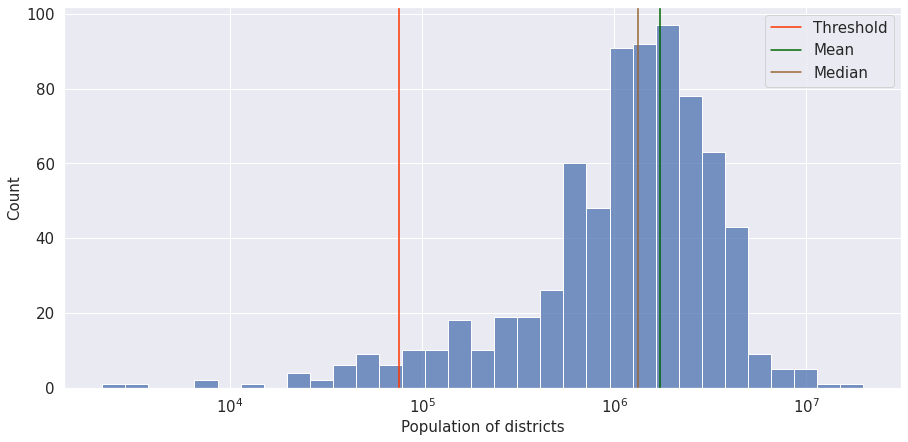

In [ ]:


sns.histplot(data=histo,log_scale=True)
plt.axvline(76000, 0, color='#ff3300',label="Threshold")
plt.axvline(1729798, 0, color='#006600',label="Mean")
plt.axvline(1331699, 0, color='#996633',label="Median")
plt.xlabel("Population of districts",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [ ]:
count=0
for col in df.columns:
  if col in pop_dic.keys():
    df[col]=df[col].astype('float')
    s=pop_dic[col]
    s=float(s)
    for j in range(len(df[col])):
      df[col][j]/=s
print(count)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0


In [ ]:
# Dropping Unknown Population Districts and Districts of Population less than 75000

In [ ]:
drop_dist=[]
countp=0
counts=0
for col in df.columns:
  if col in pop_dic.keys():
    if(int(pop_dic[col]) <= 75000 ):
      drop_dist.append(col)
      countp+=1
      print(col)
    continue
  if(col[-2:]=="-C"):
    counts+=1
    continue
  drop_dist.append(col)

Arunachal Pradesh-Anjaw
Arunachal Pradesh-Kamle
Arunachal Pradesh-Kra Daadi
Arunachal Pradesh-Lepa Rada
Arunachal Pradesh-Longding
Arunachal Pradesh-Lower Dibang Valley
Arunachal Pradesh-Pakke Kessang
Arunachal Pradesh-Shi Yomi
Arunachal Pradesh-Siang
Arunachal Pradesh-Tawang
Arunachal Pradesh-Upper Dibang Valley
Arunachal Pradesh-Upper Siang
Dadra and Nagar Haveli and Daman and Diu-Diu
Himachal Pradesh-Lahaul and Spiti
Lakshadweep-Lakshadweep
Mizoram-Hnahthial
Mizoram-Khawzawl
Mizoram-Saiha
Mizoram-Saitual
Mizoram-Serchhip
Nagaland-Kiphire
Nagaland-Longleng
Puducherry-Mahe
Puducherry-Yanam


In [ ]:
print(len(drop_dist))
print(countp)

69
24


In [ ]:
df=df.drop(drop_dist, axis = 1)

In [ ]:
df

Andhra Pradesh-Anantapur  ...      WB-C
Date                                  ...          
2020-04-26                  0.000017  ...  0.000004
2020-05-03                  0.000008  ...  0.000009
2020-05-10                  0.000005  ...  0.000009
2020-05-17                  0.000003  ...  0.000010
2020-05-24                  0.000018  ...  0.000018
2020-05-31                  0.000016  ...  0.000029
2020-06-07                  0.000035  ...  0.000032
2020-06-14                  0.000091  ...  0.000031
2020-06-21                  0.000130  ...  0.000035
2020-06-28                  0.000191  ...  0.000050
2020-07-05                  0.000260  ...  0.000079
2020-07-12                  0.000329  ...  0.000129
2020-07-19                  0.001098  ...  0.000177
2020-07-26                  0.001675  ...  0.000180
2020-08-02                  0.001818  ...  0.000217
2020-08-09                  0.001395  ...  0.000228
2020-08-16                  0.001318  ...  0.000243
2020-08-23                  0.001257  ...  0.000232
2020-08-30                  0.001246  ...  0.000229
2020-09-06                  0.001038  ...  0.000239
2020-09-13                  0.000860  ...  0.000246
2020-09-20                  0.000840  ...  0.000244
2020-09-27                  0.000635  ...  0.000249
2020-10-04                  0.000566  ...  0.000265
2020-10-11                  0.000400  ...  0.000283
2020-10-18                  0.000324  ...  0.000312
2020-10-25                  0.000249  ...  0.000308
2020-11-01                  0.000211  ...  0.000304
2020-11-08                  0.000155  ...  0.000297
2020-11-15                  0.000080  ...  0.000266
2020-11-22                  0.000055  ...  0.000270
2020-11-29                  0.000042  ...  0.000244
2020-12-06                  0.000040  ...  0.000214
2020-12-13                  0.000032  ...  0.000171
2020-12-20                  0.000031  ...  0.000122
2020-12-27                  0.000031  ...  0.000088
2021-01-03                  0.000028  ...  0.000064
2021-01-10                  0.000005  ...  0.000016

[38 rows x 645 columns]

In [ ]:
scoreDs=getDTWPath_and_Score(df)

In [ ]:
scoreDs.index=scoreDs['Names']
scoreDs.drop(labels='Names',axis=1,inplace=True)

In [ ]:
scoreDs

Andhra Pradesh-Anantapur  ...      WB-C
Names                                                   ...          
Andhra Pradesh-Anantapur                      0.000000  ...  0.003159
Andhra Pradesh-Chittoor                       0.000575  ...  0.003651
Andhra Pradesh-East Godavari                  0.000472  ...  0.004663
Andhra Pradesh-Guntur                         0.000746  ...  0.002267
Andhra Pradesh-Krishna                        0.002238  ...  0.000941
...                                                ...  ...       ...
TG-C                                          0.002512  ...  0.000398
TR-C                                          0.001241  ...  0.001338
UP-C                                          0.003425  ...  0.000185
UT-C                                          0.001392  ...  0.000870
WB-C                                          0.003159  ...  0.000000

[645 rows x 645 columns]

In [ ]:
sns.heatmap(scoreDs) #After Normalisation

In [ ]:
def hierarchical_clustering(dist_mat, method='complete'):
    if method == 'complete':
        Z = complete(dist_mat)
    if method == 'single':
        Z = single(dist_mat)
    if method == 'average':
        Z = average(dist_mat)
    if method == 'ward':
        Z = ward(dist_mat)
    fig, ax = plt.subplots()
    fig.canvas.draw()
    dn = dendrogram(Z)
    plt.title(f"Dendrogram for {method}-linkage with correlation distance")
    plt.show()

    return Z,ax.get_xticklabels()

/usr/local/lib/python3.7/dist-packages/scipy/cluster/hierarchy.py:360: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



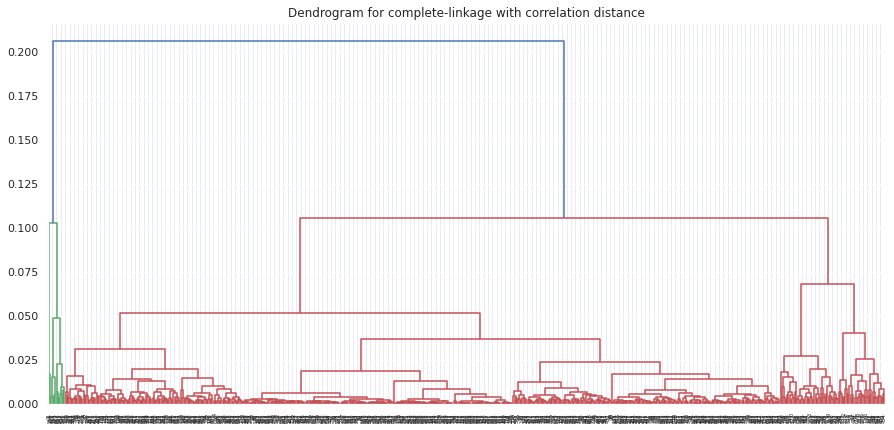

In [ ]:
linkage_matrix,labels = hierarchical_clustering(scoreDs)


In [ ]:
def createClusters(rootnode,minSize,maxSize):
  clusters=[]
  def inOrder(root,li):
    # if root==None:
    #   return
    if root.get_count()==1:
      li.append(root.get_id())
      return
    inOrder(root.left,li)
    inOrder(root.right,li)
  def helper(root,clusters,minSize,maxSize):
    if root.get_count()<=1:
      return
    if root.left.get_count()>=minSize and root.right.get_count()>=minSize and root.get_count()>maxSize:
      helper(root.left,clusters,minSize,maxSize)
      helper(root.right,clusters,minSize,maxSize)
    else:
      li=[]
      inOrder(root,li)
      clusters.append(li)
  helper(rootnode,clusters,minSize,maxSize)
  return clusters
  # return an array of size 4 where each element is a list of members of that cluster

In [ ]:
from scipy.cluster import hierarchy
rootnode, nodelist = hierarchy.to_tree(linkage_matrix, rd=True)
clusters=createClusters(rootnode,2,0.5*rootnode.get_count())
for c in clusters:
  print(c[-1])
  #breakpoints=[321,206,441,234,324,454] # Visual Clustering

321
206
441
234
454


In [ ]:
labelsd=[]
for l in labels:
  labelsd.append(int(l.get_text()))

In [ ]:
red="#ff0000"
yellow="#ffee00"
green="#09ff00"
blue="#0011ff"
purple="#dd00ff"
pink="#ff00a2"
dflt_col="#595558"
orange="#FFA500"
#breakpoints=[321,206,441,234,324,454] # Visual Clustering
D_leaf_colors={}
for label in range(len(labelsd)):
  if(label<=labelsd.index(321)):
    D_leaf_colors["attr_"+str(labelsd[label])]=red
  elif(label<=labelsd.index(206)):
    D_leaf_colors["attr_"+str(labelsd[label])]=yellow
  elif(label<=labelsd.index(441)):
    D_leaf_colors["attr_"+str(labelsd[label])]=purple
  elif(label<=labelsd.index(234)):
    D_leaf_colors["attr_"+str(labelsd[label])]=pink
  elif(label<=labelsd.index(324)):
    D_leaf_colors["attr_"+str(labelsd[label])]= dflt_col
  elif(label<=labelsd.index(454)):
    D_leaf_colors["attr_"+str(labelsd[label])]=orange


In [ ]:
link_cols = {}
for i, i12 in enumerate(linkage_matrix[:,:2].astype(int)):
  c1, c2 = (link_cols[x] if x > len(linkage_matrix) else D_leaf_colors["attr_%d"%x]
    for x in i12)
  link_cols[i+1+len(linkage_matrix)] = c1 if c1 == c2 else dflt_col

(array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
        0.225]), <a list of 10 Text major ticklabel objects>)

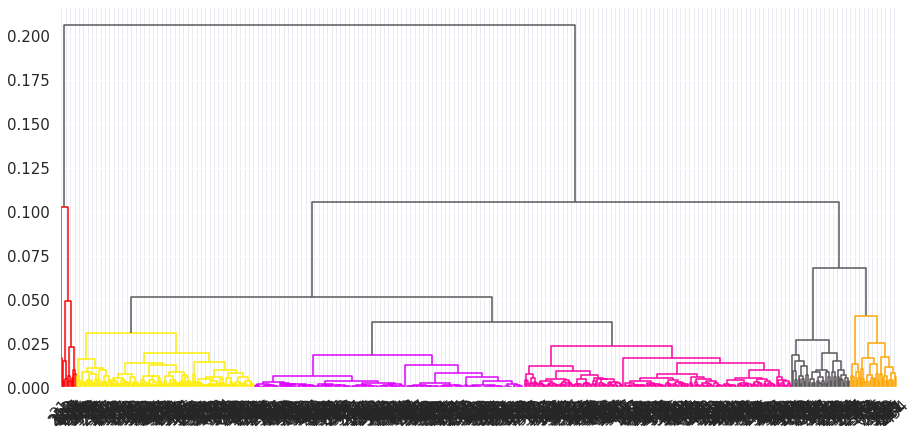

In [ ]:
D = dendrogram(Z=linkage_matrix, color_threshold=None,
  leaf_font_size=12, leaf_rotation=45, link_color_func=lambda x: link_cols[x])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [ ]:
breakpoints=[321,206,441,234,324,454] # Visual Clustering
index=[-1]
for i in range(len(breakpoints)):
  index.append(labelsd.index(breakpoints[i]))

In [ ]:
clusters=[]
for i in range(len(index)):
  clusters.append(labelsd[index[i-1]+1:index[i]+1])

In [ ]:
len(clusters[1])

13

In [ ]:
cluster_labels = fcluster(linkage_matrix, 0.03, criterion='distance',)

In [ ]:
cluster_1 =[]
cluster_2 =[]
cluster_3 =[]
for i in range(len(cluster_labels)):
  if(cluster_labels[i]==5):
    cluster_1.append(i)
  if(cluster_labels[i]==6):
    cluster_2.append(i)
  if(cluster_labels[i]==7):
    cluster_3.append(i)

In [ ]:
col_dic={}
for i in range(len(df.columns)):
  col_dic[i]=df.columns[i]

In [ ]:
np.random.shuffle(cluster_1)
print(cluster_1)

[584, 90, 408, 22, 165, 620, 306, 73, 140, 489, 486, 157, 235, 319, 365, 333, 129, 400, 492, 360, 574, 79, 174, 350, 201, 23, 634, 479, 179, 71, 311, 490, 630, 578, 399, 336, 175, 146, 370, 325, 426, 460, 478, 643, 13, 376, 233, 231, 65, 139, 145, 228, 222, 69, 330, 615, 385, 4, 206, 176, 334, 313, 92, 368, 213, 160, 181, 392, 340, 473, 525, 187, 494, 135, 406, 147, 178, 312, 639, 641, 440, 388, 442, 149, 622, 393, 411, 173, 221, 456, 581, 307, 600, 226, 375, 341, 94, 583, 482, 390, 480, 215, 151, 462, 80, 621, 638, 380, 374, 309, 270]


In [ ]:
dist_state={}
for i in range(len(col_dic)):
  k= col_dic[i].find('-')
  if col_dic[i][:k] in dist_state:
    dist_state[col_dic[i][:k]]+=1
  else :
    dist_state[col_dic[i][:k]]=1

In [ ]:
cluster_state={}
for i in cluster_1:
  k= col_dic[i].find('-')
  if col_dic[i][:k] in cluster_state:
    cluster_state[col_dic[i][:k]]+=1
  else :
    cluster_state[col_dic[i][:k]]=1

In [ ]:

sorted(cluster_state.items(), key=operator.itemgetter(1))

[('HR', 1),
 ('Nagaland', 1),
 ('Mizoram', 1),
 ('OR', 1),
 ('MN', 1),
 ('UT', 1),
 ('CT', 1),
 ('Andhra Pradesh', 1),
 ('Uttar Pradesh', 1),
 ('TN', 1),
 ('TR', 1),
 ('JK', 1),
 ('West Bengal', 1),
 ('Dadra and Nagar Haveli and Daman and Diu', 1),
 ('HP', 1),
 ('SK', 1),
 ('Madhya Pradesh', 1),
 ('Jharkhand', 2),
 ('Meghalaya', 2),
 ('Arunachal Pradesh', 3),
 ('Himachal Pradesh', 3),
 ('Rajasthan', 3),
 ('Tripura', 4),
 ('Uttarakhand', 5),
 ('Punjab', 5),
 ('Chhattisgarh', 8),
 ('Jammu and Kashmir', 8),
 ('Haryana', 8),
 ('Tamil Nadu', 9),
 ('Karnataka', 10),
 ('Maharashtra', 12),
 ('Odisha', 12)]

In [ ]:
for c in cluster_state:
  cluster_state[c] = (cluster_state[c] / dist_state [c]) * 100

In [ ]:

sorted(cluster_state.items(), key=operator.itemgetter(1))

[('Uttar Pradesh', 1.3333333333333335),
 ('Madhya Pradesh', 1.9230769230769231),
 ('West Bengal', 4.3478260869565215),
 ('Andhra Pradesh', 7.6923076923076925),
 ('Jharkhand', 8.333333333333332),
 ('Rajasthan', 9.090909090909092),
 ('Nagaland', 11.11111111111111),
 ('Mizoram', 16.666666666666664),
 ('Meghalaya', 18.181818181818183),
 ('Punjab', 22.727272727272727),
 ('Arunachal Pradesh', 23.076923076923077),
 ('Tamil Nadu', 24.324324324324326),
 ('Himachal Pradesh', 27.27272727272727),
 ('Chhattisgarh', 28.57142857142857),
 ('Karnataka', 33.33333333333333),
 ('Maharashtra', 34.285714285714285),
 ('Haryana', 36.36363636363637),
 ('Uttarakhand', 38.46153846153847),
 ('Jammu and Kashmir', 40.0),
 ('Odisha', 40.0),
 ('Tripura', 50.0),
 ('Dadra and Nagar Haveli and Daman and Diu', 50.0),
 ('HR', 100.0),
 ('OR', 100.0),
 ('MN', 100.0),
 ('UT', 100.0),
 ('CT', 100.0),
 ('TN', 100.0),
 ('TR', 100.0),
 ('JK', 100.0),
 ('HP', 100.0),
 ('SK', 100.0)]

Text(0.5, 0, 'Cluster 1 - National Avegare Cluster')

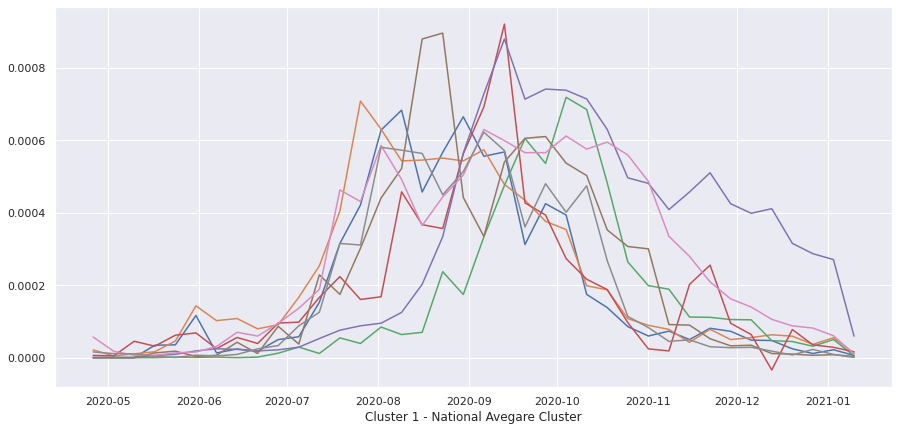

In [ ]:
plt.plot(df[col_dic[228]])
plt.plot(df[col_dic[222]])
plt.plot(df[col_dic[69]])
plt.plot(df[col_dic[330]])
plt.plot(df[col_dic[615]])
plt.plot(df[col_dic[385]])
plt.plot(df[col_dic[4]])
plt.plot(df[col_dic[206]])

plt.xlabel("Cluster 1 - National Avegare Cluster")


In [ ]:
np.random.shuffle(cluster_2)
print(cluster_2)

[199, 505, 537, 527, 567, 507, 558, 252, 97, 253, 552, 287, 449, 184, 60, 514, 36, 267, 123, 297, 566, 50, 286, 193, 597, 45, 263, 120, 344, 275, 642, 506, 421, 288, 363, 530, 533, 256, 448, 298, 128, 202, 531, 53, 358, 38, 497, 540, 593, 520, 603, 550, 446, 35, 191, 555, 188, 105, 504, 104, 59, 301, 37, 118, 295, 289, 598, 430, 428, 556, 303, 569, 587, 422, 262, 40, 112, 299, 339, 100, 517, 58, 119, 541, 142, 586, 627, 98, 524, 99, 109, 445, 549, 279, 570, 538, 561, 284, 257, 508, 502, 106, 300, 265, 523, 562, 509, 424, 285, 117, 606, 29, 628, 349, 535, 543, 439, 183, 516, 55, 553, 268, 528, 186, 259, 518, 102, 280, 258, 447, 546, 277, 415, 418, 501, 63, 346, 52, 264, 345, 568, 548, 500, 34, 293, 554, 196, 255, 515, 292, 534, 261, 113, 607, 46, 342, 291, 32, 542, 429, 62, 101, 266, 362, 613, 56, 111, 436, 103, 269, 126, 31, 43, 302, 594, 281, 42, 107, 189, 114, 48, 519, 125, 510, 547, 276, 427, 532, 198, 619, 423, 441, 565, 61, 605, 563, 116, 361, 499, 28, 434, 513, 355, 115, 296, 443

Text(0.5, 0, 'Cluster 2 - HIndi Plateau Cluster')

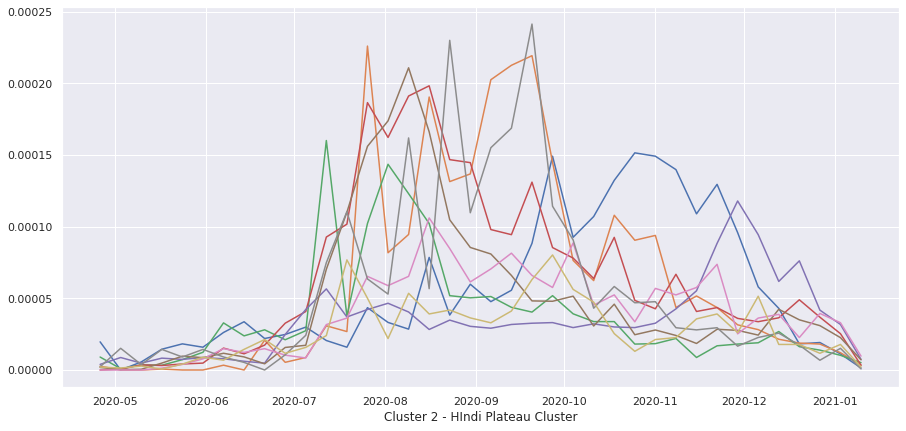

In [ ]:
plt.plot(df[col_dic[439]])
plt.plot(df[col_dic[184]])
plt.plot(df[col_dic[60]])
plt.plot(df[col_dic[48]])
plt.plot(df[col_dic[112]])
plt.plot(df[col_dic[56]])
plt.plot(df[col_dic[287]])
plt.plot(df[col_dic[188]])
plt.plot(df[col_dic[441]])
plt.xlabel("Cluster 2 - HIndi Plateau Cluster")

In [ ]:
cluster_state={}
for i in cluster_2:
  k= col_dic[i].find('-')
  if col_dic[i][:k] in cluster_state:
    cluster_state[col_dic[i][:k]]+=1
  else :
    cluster_state[col_dic[i][:k]]=1

In [ ]:

sorted(cluster_state.items(), key=operator.itemgetter(1))

[('UP', 1),
 ('Haryana', 1),
 ('LD', 1),
 ('MP', 1),
 ('BR', 1),
 ('GJ', 1),
 ('Mizoram', 1),
 ('Punjab', 2),
 ('Nagaland', 4),
 ('Meghalaya', 6),
 ('West Bengal', 10),
 ('Jharkhand', 11),
 ('Rajasthan', 18),
 ('Bihar', 26),
 ('Gujarat', 27),
 ('Madhya Pradesh', 41),
 ('Uttar Pradesh', 56)]

In [ ]:
for c in cluster_state:
  cluster_state[c] = (cluster_state[c] / dist_state [c]) * 100

In [ ]:

sorted(cluster_state.items(), key=operator.itemgetter(1))

[('Haryana', 4.545454545454546),
 ('Punjab', 9.090909090909092),
 ('Mizoram', 16.666666666666664),
 ('West Bengal', 43.47826086956522),
 ('Nagaland', 44.44444444444444),
 ('Jharkhand', 45.83333333333333),
 ('Rajasthan', 54.54545454545454),
 ('Meghalaya', 54.54545454545454),
 ('Bihar', 68.42105263157895),
 ('Uttar Pradesh', 74.66666666666667),
 ('Madhya Pradesh', 78.84615384615384),
 ('Gujarat', 81.81818181818183),
 ('UP', 100.0),
 ('LD', 100.0),
 ('MP', 100.0),
 ('BR', 100.0),
 ('GJ', 100.0)]

In [ ]:
np.random.shuffle(cluster_3)
print(cluster_3)

[463, 431, 274, 637, 432, 475, 310, 458, 57, 417, 17, 51, 282, 377, 343, 337, 154, 372, 559, 283, 588, 200, 575, 485, 572, 526, 41, 484, 211, 522, 67, 136, 433, 387, 364, 75, 353, 143, 271, 419, 503, 491, 164, 640, 536, 153, 564, 487, 394, 557, 354, 141, 474, 407, 452, 512, 224, 590, 573, 397, 138, 577, 402, 16, 451, 44, 437, 278, 467, 131, 405, 608, 435, 595, 122, 636, 150, 39, 159, 560, 382, 322, 205, 148, 18, 373, 592, 133, 529, 511, 481, 33, 27, 323, 471, 464, 127, 108, 93, 398, 190, 369, 359, 551, 571, 177, 110, 466, 162, 384, 367, 493, 616, 78, 386, 401, 185, 633, 195, 208, 420, 317, 234, 579, 26, 366, 30, 338, 294, 539, 438, 137, 465, 410, 582, 152, 632, 470, 416, 305, 194, 623, 161, 172, 229, 601, 476, 182, 580, 483, 130, 404, 66, 644, 604, 171, 272, 84, 348, 19, 457, 602, 14, 20, 459, 197, 444, 315, 412, 76, 212, 74, 96, 49, 544, 124, 83, 631, 204, 612, 409, 308, 192, 47, 591, 254, 469, 498, 327, 413, 351, 347, 585, 450, 169, 599, 403, 82, 352, 521, 381, 54, 203, 425, 589, 379

In [ ]:
plt.plot(df[col_dic[343]])
plt.plot(df[col_dic[521]])
plt.plot(df[col_dic[138]],label="green456")
plt.plot(df[col_dic[450]])
plt.plot(df[col_dic[16]])
plt.plot(df[col_dic[564]])
plt.plot(df[col_dic[589]])
plt.plot(df[col_dic[526]])
plt.xlabel("Cluster 3")
plt.legend()

In [ ]:
cluster_state={}
for i in cluster_3:
  k= col_dic[i].find('-')
  if col_dic[i][:k] in cluster_state:
    cluster_state[col_dic[i][:k]]+=1
  else :
    cluster_state[col_dic[i][:k]]=1

In [ ]:

sorted(cluster_state.items(), key=operator.itemgetter(1))

[('RJ', 1),
 ('TG', 1),
 ('TT', 1),
 ('PB', 1),
 ('Dadra and Nagar Haveli and Daman and Diu', 1),
 ('DN', 1),
 ('NL', 1),
 ('MZ', 1),
 ('JH', 1),
 ('WB', 1),
 ('ML', 1),
 ('AS', 1),
 ('Nagaland', 2),
 ('Tripura', 2),
 ('Meghalaya', 3),
 ('Mizoram', 4),
 ('Himachal Pradesh', 5),
 ('Arunachal Pradesh', 6),
 ('Karnataka', 6),
 ('Jammu and Kashmir', 6),
 ('Gujarat', 6),
 ('Uttarakhand', 7),
 ('Madhya Pradesh', 8),
 ('Chhattisgarh', 9),
 ('Maharashtra', 10),
 ('Haryana', 10),
 ('West Bengal', 11),
 ('Jharkhand', 11),
 ('Rajasthan', 12),
 ('Bihar', 12),
 ('Odisha', 13),
 ('Punjab', 14),
 ('Uttar Pradesh', 17),
 ('Tamil Nadu', 20)]

In [ ]:
for c in cluster_state:
  cluster_state[c] = (cluster_state[c] / dist_state [c]) * 100

In [ ]:

sorted(cluster_state.items(), key=operator.itemgetter(1))

[('Madhya Pradesh', 15.384615384615385),
 ('Gujarat', 18.181818181818183),
 ('Karnataka', 20.0),
 ('Nagaland', 22.22222222222222),
 ('Uttar Pradesh', 22.666666666666664),
 ('Tripura', 25.0),
 ('Meghalaya', 27.27272727272727),
 ('Maharashtra', 28.57142857142857),
 ('Jammu and Kashmir', 30.0),
 ('Bihar', 31.57894736842105),
 ('Chhattisgarh', 32.142857142857146),
 ('Rajasthan', 36.36363636363637),
 ('Odisha', 43.333333333333336),
 ('Himachal Pradesh', 45.45454545454545),
 ('Haryana', 45.45454545454545),
 ('Jharkhand', 45.83333333333333),
 ('Arunachal Pradesh', 46.15384615384615),
 ('West Bengal', 47.82608695652174),
 ('Dadra and Nagar Haveli and Daman and Diu', 50.0),
 ('Uttarakhand', 53.84615384615385),
 ('Tamil Nadu', 54.054054054054056),
 ('Punjab', 63.63636363636363),
 ('Mizoram', 66.66666666666666),
 ('RJ', 100.0),
 ('TG', 100.0),
 ('TT', 100.0),
 ('PB', 100.0),
 ('DN', 100.0),
 ('NL', 100.0),
 ('MZ', 100.0),
 ('JH', 100.0),
 ('WB', 100.0),
 ('ML', 100.0),
 ('AS', 100.0)]

Next Meeting :

1. Add all the states with this district data -Done
2. Top 10 States for each districts cluster - Done
3. Correlate states cluster and districts cluster - !!HOW??
4. Drop all districts with pop <=75k - Done
5. Finalise the colour geographic map - Pramit

Stretch Goals :

1. Kmeans
2. Analysis deceased data

Next Meeting :

1. Find numbers range in dendrogram - Done
2. Try merge the clusters - Done
3. Complete the correlation and analysis with states cluster - Done
4. Try colour the dendrogram as well - Done
5. Overlay red districts in India's map  -

Stretch Goals :

1. Kmeans
2. Analysis deceased data

# Analysis of Cluster 1D

In [ ]:
clusters[1]

[21, 251, 210, 328, 134, 396, 617, 618, 635, 243, 626, 246, 321]

In [ ]:
for c in clusters[1]:
  print(col_dic[c])

Arunachal Pradesh-Papum Pare
Ladakh-Leh
Karnataka-Bengaluru Urban
Maharashtra-Pune
Haryana-Gurugram
Puducherry-Puducherry
DL-C
GA-C
PY-C
Kerala-Kozhikode
LA-C
Kerala-Pathanamthitta
Maharashtra-Nagpur


In [ ]:
for e in clusters[6]:
  print(col_dic[e],e)

Delhi-Delhi 95
Kerala-Kottayam 242
Kerala-Alappuzha 236
Kerala-Ernakulam 237
Andhra Pradesh-East Godavari 2
Kerala-Thrissur 248
Andhra Pradesh-S.P.S. Nellore 7
Odisha-Khordha 383
West Bengal-Kolkata 596
Andhra Pradesh-Chittoor 1
Andhra Pradesh-Vizianagaram 10
Andhra Pradesh-Y.S.R. Kadapa 12
Punjab-S.A.S. Nagar 414
Chandigarh-Chandigarh 64
CH-C 614
Andhra Pradesh-Srikakulam 8
Karnataka-Udupi 232
Maharashtra-Satara 332
Andhra Pradesh-Kurnool 5
Karnataka-Bengaluru Rural 209
Himachal Pradesh-Kinnaur 155
Andhra Pradesh-Prakasam 6
Chhattisgarh-Bijapur 70
Puducherry-Karaikal 395
Haryana-Faridabad 132
Maharashtra-Sangli 331
Kerala-Wayanad 249
Chhattisgarh-Bametara 68
Kerala-Malappuram 244
KL-C 625
Kerala-Kollam 241
Maharashtra-Raigad 329
Kerala-Thiruvananthapuram 247
Tamil Nadu-Kancheepuram 461
Andhra Pradesh-West Godavari 11
Tamil Nadu-Chennai 454


In [ ]:
def plot_distclusters(k,plt_custom):
  np.random.shuffle(clusters[k])
  plt.ylim(-0.0002579584431782748, 0.00541712730674377)
  for i in range(10):
    plt_custom.plot(df[col_dic[clusters[k][i]]])
def plot_distclusters1(k,plt_custom):
  np.random.shuffle(clusters[k])
  plt.ylim(-0.0002579584431782748, 0.00541712730674377)
  for i in range(10):
    plt_custom.plot(df[col_dic[clusters[k][i]]])
  plt_custom.plot(df[col_dic[clusters[5][0]]],c='#000000')
  #plt_custom.plot(df[col_dic[clusters[5][1]]],c='#000000')
  plt_custom.plot(df[col_dic[clusters[6][0]]],c='#000000')
  #plt_custom.plot(df[col_dic[clusters[6][1]]],c='#000000')



In [ ]:
np.random.shuffle(clusters[1])

(-0.0002579584431782748, 0.00541712730674377)

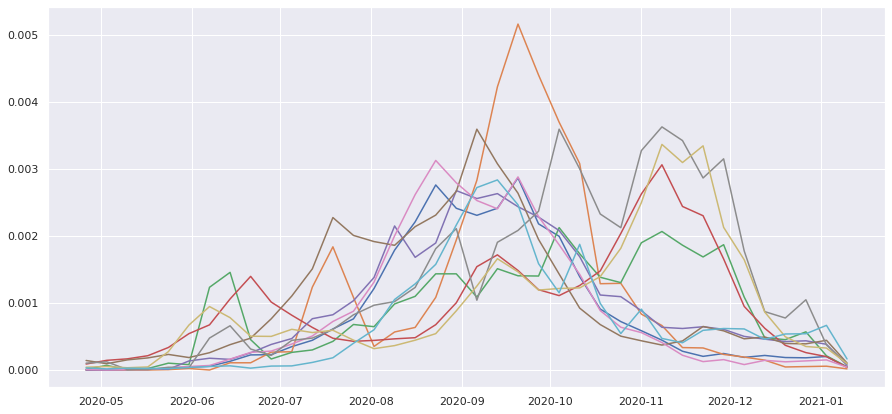

In [ ]:
for i in range(10):
  plt.plot(df[col_dic[clusters[1][i]]])
plt.gca().get_ylim()

In [ ]:
cluster_state={}
for i in clusters[1]:
  k= col_dic[i].find('-')
  if col_dic[i][:k] in cluster_state:
    cluster_state[col_dic[i][:k]]+=1
  else :
    cluster_state[col_dic[i][:k]]=1

In [ ]:
def helper(num):
  cluster_state={}
  for i in clusters[num]:
    k= col_dic[i].find('-')
    if col_dic[i][:k] in cluster_state:
      cluster_state[col_dic[i][:k]]+=1
    else :
      cluster_state[col_dic[i][:k]]=1
  for c in cluster_state:
    cluster_state[c] = (cluster_state[c] / dist_state [c]) * 100
  return sorted(cluster_state.items(), key=operator.itemgetter(1))

In [ ]:
sorted(cluster_state.items(), key=operator.itemgetter(1))

[('PY', 1),
 ('Arunachal Pradesh', 1),
 ('LA', 1),
 ('DL', 1),
 ('GA', 1),
 ('Puducherry', 1),
 ('Ladakh', 1),
 ('Haryana', 1),
 ('Karnataka', 1),
 ('Maharashtra', 2),
 ('Kerala', 2)]

In [ ]:
for c in cluster_state:
  cluster_state[c] = (cluster_state[c] / dist_state [c]) * 100
sorted(cluster_state.items(), key=operator.itemgetter(1))

[('Karnataka', 3.3333333333333335),
 ('Haryana', 4.545454545454546),
 ('Maharashtra', 5.714285714285714),
 ('Arunachal Pradesh', 7.6923076923076925),
 ('Kerala', 14.285714285714285),
 ('Puducherry', 50.0),
 ('Ladakh', 50.0),
 ('PY', 100.0),
 ('LA', 100.0),
 ('DL', 100.0),
 ('GA', 100.0)]

In [ ]:
for c in clusters[1]:
  print(col_dic[c])

PY-C
Arunachal Pradesh-Papum Pare
LA-C
DL-C
GA-C
Maharashtra-Pune
Puducherry-Puducherry
Ladakh-Leh
Haryana-Gurugram
Maharashtra-Nagpur
Karnataka-Bengaluru Urban
Kerala-Kozhikode
Kerala-Pathanamthitta


## Comments on 1D

* Directly Correlates with 1S

# Analysis of Cluster 2D

In [ ]:
count=0
for c in clusters[2]:
  idx = col_dic[c].find('-')
  if(col_dic[c][:idx]=="Maharashtra" or col_dic[c][:idx]=="Karnataka" or col_dic[c][:idx]=="Andhra Pradesh" or col_dic[c][idx+1:] =='C' or col_dic[c][:idx]=="Arunachal Pradesh" or col_dic[c][:idx]=="Chandigarh"):
    continue
  #print(col_dic[c][idx+1:])
  count+=1

In [ ]:
count

89

In [ ]:
clusters[2]
np.random.shuffle(clusters[2])
for i in range(10):
  plt.plot(df[col_dic[clusters[2][i]]])
cluster_state={}
for i in clusters[2]:
  k= col_dic[i].find('-')
  if col_dic[i][:k] in cluster_state:
    cluster_state[col_dic[i][:k]]+=1
  else :
    cluster_state[col_dic[i][:k]]=1


In [ ]:
sorted(cluster_state.items(), key=operator.itemgetter(1))

[('TN', 1),
 ('JK', 1),
 ('Andhra Pradesh', 1),
 ('AR', 1),
 ('HP', 1),
 ('OR', 1),
 ('TR', 1),
 ('Mizoram', 1),
 ('Dadra and Nagar Haveli and Daman and Diu', 1),
 ('UT', 1),
 ('CT', 1),
 ('SK', 1),
 ('MN', 1),
 ('West Bengal', 1),
 ('Uttar Pradesh', 1),
 ('HR', 1),
 ('Madhya Pradesh', 2),
 ('Nagaland', 2),
 ('Jharkhand', 2),
 ('Meghalaya', 2),
 ('Rajasthan', 3),
 ('Himachal Pradesh', 4),
 ('Tripura', 5),
 ('Uttarakhand', 5),
 ('Punjab', 5),
 ('Arunachal Pradesh', 6),
 ('Haryana', 8),
 ('Chhattisgarh', 11),
 ('Jammu and Kashmir', 11),
 ('Tamil Nadu', 11),
 ('Odisha', 14),
 ('Maharashtra', 14),
 ('Karnataka', 16)]

In [ ]:
for c in cluster_state:
  cluster_state[c] = (cluster_state[c] / dist_state [c]) * 100
sorted(cluster_state.items(), key=operator.itemgetter(1))

[('Uttar Pradesh', 1.3333333333333335),
 ('Madhya Pradesh', 3.8461538461538463),
 ('West Bengal', 4.3478260869565215),
 ('Andhra Pradesh', 7.6923076923076925),
 ('Jharkhand', 8.333333333333332),
 ('Rajasthan', 9.090909090909092),
 ('Mizoram', 16.666666666666664),
 ('Meghalaya', 18.181818181818183),
 ('Nagaland', 22.22222222222222),
 ('Punjab', 22.727272727272727),
 ('Tamil Nadu', 29.72972972972973),
 ('Haryana', 36.36363636363637),
 ('Himachal Pradesh', 36.36363636363637),
 ('Uttarakhand', 38.46153846153847),
 ('Chhattisgarh', 39.285714285714285),
 ('Maharashtra', 40.0),
 ('Arunachal Pradesh', 46.15384615384615),
 ('Odisha', 46.666666666666664),
 ('Dadra and Nagar Haveli and Daman and Diu', 50.0),
 ('Karnataka', 53.333333333333336),
 ('Jammu and Kashmir', 55.00000000000001),
 ('Tripura', 62.5),
 ('TN', 100.0),
 ('JK', 100.0),
 ('AR', 100.0),
 ('HP', 100.0),
 ('OR', 100.0),
 ('TR', 100.0),
 ('UT', 100.0),
 ('CT', 100.0),
 ('SK', 100.0),
 ('MN', 100.0),
 ('HR', 100.0)]

## Comments on 2D

* Directly Correlates with 2S

# Analysis of Cluster 3D

In [ ]:
np.random.shuffle(clusters[3])
for i in range(10):
  plt.plot(df[col_dic[clusters[3][i]]])
cluster_state={}
for i in clusters[3]:
  k= col_dic[i].find('-')
  if col_dic[i][:k] in cluster_state:
    cluster_state[col_dic[i][:k]]+=1
  else :
    cluster_state[col_dic[i][:k]]=1


In [ ]:
sorted(cluster_state.items(), key=operator.itemgetter(1))

[('Haryana', 1),
 ('GJ', 1),
 ('UP', 1),
 ('BR', 1),
 ('MP', 1),
 ('Mizoram', 1),
 ('LD', 1),
 ('Punjab', 2),
 ('Nagaland', 4),
 ('Meghalaya', 6),
 ('West Bengal', 10),
 ('Jharkhand', 11),
 ('Rajasthan', 18),
 ('Bihar', 26),
 ('Gujarat', 27),
 ('Madhya Pradesh', 41),
 ('Uttar Pradesh', 56)]

In [ ]:
for c in cluster_state:
  cluster_state[c] = (cluster_state[c] / dist_state [c]) * 100
sorted(cluster_state.items(), key=operator.itemgetter(1))

[('Haryana', 4.545454545454546),
 ('Punjab', 9.090909090909092),
 ('Mizoram', 16.666666666666664),
 ('West Bengal', 43.47826086956522),
 ('Nagaland', 44.44444444444444),
 ('Jharkhand', 45.83333333333333),
 ('Meghalaya', 54.54545454545454),
 ('Rajasthan', 54.54545454545454),
 ('Bihar', 68.42105263157895),
 ('Uttar Pradesh', 74.66666666666667),
 ('Madhya Pradesh', 78.84615384615384),
 ('Gujarat', 81.81818181818183),
 ('GJ', 100.0),
 ('UP', 100.0),
 ('BR', 100.0),
 ('MP', 100.0),
 ('LD', 100.0)]

## Comments on 3D

* Directly Correlates with 4S

# Analysis of Cluster 4D

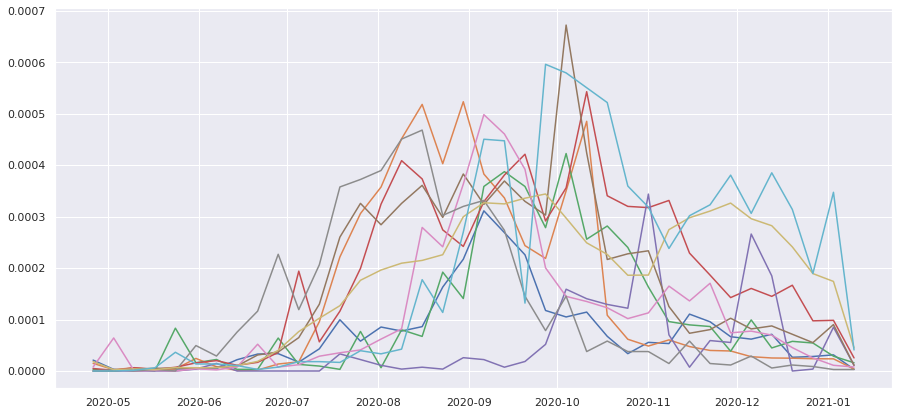

In [ ]:
np.random.shuffle(clusters[4])
for i in range(10):
  plt.plot(df[col_dic[clusters[4][i]]])
cluster_state={}
for i in clusters[4]:
  k= col_dic[i].find('-')
  if col_dic[i][:k] in cluster_state:
    cluster_state[col_dic[i][:k]]+=1
  else :
    cluster_state[col_dic[i][:k]]=1


In [ ]:
sorted(cluster_state.items(), key=operator.itemgetter(1))

[('Dadra and Nagar Haveli and Daman and Diu', 1),
 ('AS', 1),
 ('RJ', 1),
 ('DN', 1),
 ('JH', 1),
 ('ML', 1),
 ('MZ', 1),
 ('NL', 1),
 ('PB', 1),
 ('WB', 1),
 ('TT', 1),
 ('TG', 1),
 ('Tripura', 2),
 ('Nagaland', 2),
 ('Meghalaya', 3),
 ('Mizoram', 4),
 ('Himachal Pradesh', 5),
 ('Karnataka', 6),
 ('Gujarat', 6),
 ('Jammu and Kashmir', 6),
 ('Arunachal Pradesh', 6),
 ('Uttarakhand', 7),
 ('Madhya Pradesh', 8),
 ('Chhattisgarh', 9),
 ('Haryana', 10),
 ('Maharashtra', 10),
 ('Jharkhand', 11),
 ('West Bengal', 11),
 ('Bihar', 12),
 ('Rajasthan', 12),
 ('Odisha', 13),
 ('Punjab', 14),
 ('Uttar Pradesh', 17),
 ('Tamil Nadu', 20)]

In [ ]:
for c in cluster_state:
  cluster_state[c] = (cluster_state[c] / dist_state [c]) * 100
sorted(cluster_state.items(), key=operator.itemgetter(1))

[('Madhya Pradesh', 15.384615384615385),
 ('Gujarat', 18.181818181818183),
 ('Karnataka', 20.0),
 ('Nagaland', 22.22222222222222),
 ('Uttar Pradesh', 22.666666666666664),
 ('Tripura', 25.0),
 ('Meghalaya', 27.27272727272727),
 ('Maharashtra', 28.57142857142857),
 ('Jammu and Kashmir', 30.0),
 ('Bihar', 31.57894736842105),
 ('Chhattisgarh', 32.142857142857146),
 ('Rajasthan', 36.36363636363637),
 ('Odisha', 43.333333333333336),
 ('Himachal Pradesh', 45.45454545454545),
 ('Haryana', 45.45454545454545),
 ('Jharkhand', 45.83333333333333),
 ('Arunachal Pradesh', 46.15384615384615),
 ('West Bengal', 47.82608695652174),
 ('Dadra and Nagar Haveli and Daman and Diu', 50.0),
 ('Uttarakhand', 53.84615384615385),
 ('Tamil Nadu', 54.054054054054056),
 ('Punjab', 63.63636363636363),
 ('Mizoram', 66.66666666666666),
 ('AS', 100.0),
 ('RJ', 100.0),
 ('DN', 100.0),
 ('JH', 100.0),
 ('ML', 100.0),
 ('MZ', 100.0),
 ('NL', 100.0),
 ('PB', 100.0),
 ('WB', 100.0),
 ('TT', 100.0),
 ('TG', 100.0)]

## Comments on 4D

* Directly Correlates with 3S

# Analysis of Cluster 5D

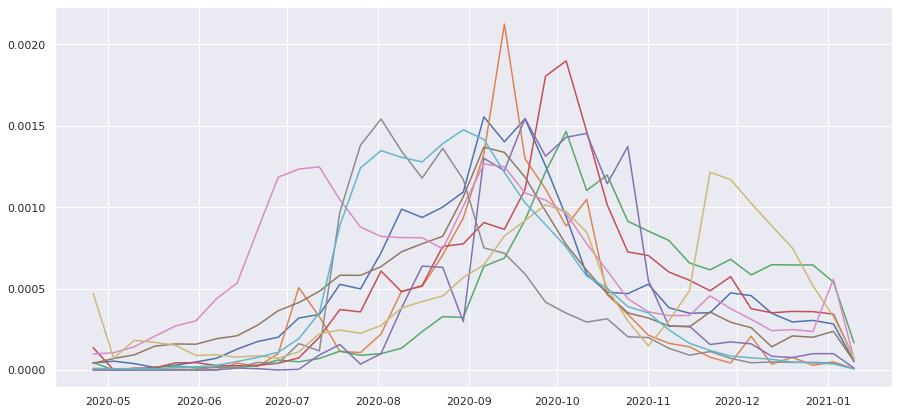

In [ ]:
np.random.shuffle(clusters[5])
for i in range(10):
  plt.plot(df[col_dic[clusters[5][i]]])
cluster_state={}
for i in clusters[5]:
  k= col_dic[i].find('-')
  if col_dic[i][:k] in cluster_state:
    cluster_state[col_dic[i][:k]]+=1
  else :
    cluster_state[col_dic[i][:k]]=1


In [ ]:
sorted(cluster_state.items(), key=operator.itemgetter(1))

[('MH', 1),
 ('Madhya Pradesh', 1),
 ('AP', 1),
 ('Ladakh', 1),
 ('AN', 1),
 ('Himachal Pradesh', 1),
 ('Uttar Pradesh', 1),
 ('Uttarakhand', 1),
 ('Tripura', 1),
 ('KA', 1),
 ('Nagaland', 1),
 ('Haryana', 1),
 ('Odisha', 2),
 ('Andhra Pradesh', 3),
 ('Jammu and Kashmir', 3),
 ('Kerala', 4),
 ('Tamil Nadu', 4),
 ('Karnataka', 5),
 ('Maharashtra', 6),
 ('Chhattisgarh', 6)]

In [ ]:
for c in cluster_state:
  cluster_state[c] = (cluster_state[c] / dist_state [c]) * 100
sorted(cluster_state.items(), key=operator.itemgetter(1))

[('Uttar Pradesh', 1.3333333333333335),
 ('Madhya Pradesh', 1.9230769230769231),
 ('Haryana', 4.545454545454546),
 ('Odisha', 6.666666666666667),
 ('Uttarakhand', 7.6923076923076925),
 ('Himachal Pradesh', 9.090909090909092),
 ('Tamil Nadu', 10.81081081081081),
 ('Nagaland', 11.11111111111111),
 ('Tripura', 12.5),
 ('Jammu and Kashmir', 15.0),
 ('Karnataka', 16.666666666666664),
 ('Maharashtra', 17.142857142857142),
 ('Chhattisgarh', 21.428571428571427),
 ('Andhra Pradesh', 23.076923076923077),
 ('Kerala', 28.57142857142857),
 ('Ladakh', 50.0),
 ('MH', 100.0),
 ('AP', 100.0),
 ('AN', 100.0),
 ('KA', 100.0)]

In [ ]:
for c in clusters[5]:
  print(col_dic[c])

Maharashtra-Nashik
Chhattisgarh-Narayanpur
Kerala-Kannur
Kerala-Kasaragod
Chhattisgarh-Sukma
MH-C
Maharashtra-Thane
Andhra Pradesh-Visakhapatnam
Madhya Pradesh-Indore
AP-C
Jammu and Kashmir-Ganderbal
Karnataka-Shivamogga
Jammu and Kashmir-Jammu
Ladakh-Kargil
Karnataka-Mysuru
Andhra Pradesh-Anantapur
Tamil Nadu-Coimbatore
AN-C
Himachal Pradesh-Shimla
Kerala-Palakkad
Kerala-Idukki
Odisha-Jharsuguda
Tamil Nadu-Theni
Karnataka-Dakshina Kannada
Karnataka-Ballari
Uttar Pradesh-Lucknow
Chhattisgarh-Raipur
Maharashtra-Mumbai
Uttarakhand-Dehradun
Andhra Pradesh-Guntur
Tripura-West Tripura
Maharashtra-Jalgaon
Chhattisgarh-Surguja
KA-C
Odisha-Nuapada
Chhattisgarh-Raigarh
Nagaland-Dimapur
Maharashtra-Kolhapur
Maharashtra-Ahmednagar
Jammu and Kashmir-Srinagar
Haryana-Panchkula
Tamil Nadu-Chengalpattu
Karnataka-Hassan
Chhattisgarh-Korba
Tamil Nadu-Ranipet


## Comments on 5D

* Should be merged with 2D
* Chhatisgarh - major cities
* MH-C as a state
* Presence of many big cities - Mumbai, Nashik, Kolhapur, Indore, Ahmedabad, Lucknow, Vishakapatnam, Srinagar, Raipur

# Analysis of Cluster 6D

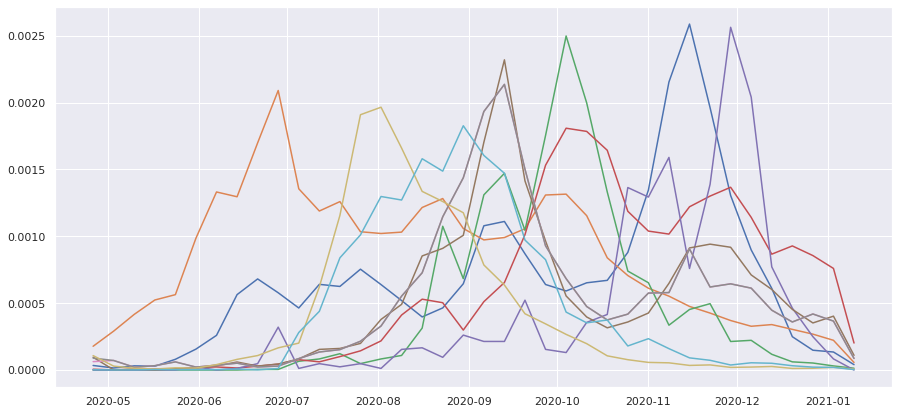

In [ ]:
np.random.shuffle(clusters[6])
for i in range(10):
  plt.plot(df[col_dic[clusters[6][i]]])
cluster_state={}
for i in clusters[6]:
  k= col_dic[i].find('-')
  if col_dic[i][:k] in cluster_state:
    cluster_state[col_dic[i][:k]]+=1
  else :
    cluster_state[col_dic[i][:k]]=1


In [ ]:
sorted(cluster_state.items(), key=operator.itemgetter(1))

[('Haryana', 1),
 ('Himachal Pradesh', 1),
 ('Punjab', 1),
 ('CH', 1),
 ('Chandigarh', 1),
 ('KL', 1),
 ('West Bengal', 1),
 ('Delhi', 1),
 ('Odisha', 1),
 ('Puducherry', 1),
 ('Tamil Nadu', 2),
 ('Chhattisgarh', 2),
 ('Karnataka', 2),
 ('Maharashtra', 3),
 ('Kerala', 8),
 ('Andhra Pradesh', 9)]

In [ ]:
for c in cluster_state:
  cluster_state[c] = (cluster_state[c] / dist_state [c]) * 100
sorted(cluster_state.items(), key=operator.itemgetter(1))

[('Odisha', 3.3333333333333335),
 ('West Bengal', 4.3478260869565215),
 ('Haryana', 4.545454545454546),
 ('Punjab', 4.545454545454546),
 ('Tamil Nadu', 5.405405405405405),
 ('Karnataka', 6.666666666666667),
 ('Chhattisgarh', 7.142857142857142),
 ('Maharashtra', 8.571428571428571),
 ('Himachal Pradesh', 9.090909090909092),
 ('Puducherry', 50.0),
 ('Kerala', 57.14285714285714),
 ('Andhra Pradesh', 69.23076923076923),
 ('CH', 100.0),
 ('Chandigarh', 100.0),
 ('KL', 100.0),
 ('Delhi', 100.0)]

In [ ]:
for c in clusters[6]:
  print(col_dic[c])

Haryana-Faridabad
Tamil Nadu-Chennai
Chhattisgarh-Bijapur
Kerala-Malappuram
Himachal Pradesh-Kinnaur
Punjab-S.A.S. Nagar
CH-C
Chandigarh-Chandigarh
Andhra Pradesh-Kurnool
Andhra Pradesh-Srikakulam
Maharashtra-Raigad
KL-C
Maharashtra-Sangli
Kerala-Wayanad
West Bengal-Kolkata
Kerala-Kottayam
Kerala-Kollam
Delhi-Delhi
Andhra Pradesh-Chittoor
Karnataka-Bengaluru Rural
Odisha-Khordha
Kerala-Alappuzha
Andhra Pradesh-Y.S.R. Kadapa
Andhra Pradesh-S.P.S. Nellore
Puducherry-Karaikal
Kerala-Thrissur
Kerala-Ernakulam
Maharashtra-Satara
Andhra Pradesh-East Godavari
Andhra Pradesh-Vizianagaram
Karnataka-Udupi
Tamil Nadu-Kancheepuram
Chhattisgarh-Bametara
Kerala-Thiruvananthapuram
Andhra Pradesh-West Godavari
Andhra Pradesh-Prakasam


## Comments on 6D

* Should be merged with 2D
* Presence of many big cities - Kolkata, Chennai, Ernakulum, Chandigar, Faridabad, Delhi

# Final DS-SC Correlation

* 1D -> 1S (Unreliable)

* 2D+5D+6D -> 2S (Sharp Rise n Decline | Hotspot)

* 3D -> 4S (Hindi States | Plateau)

* 4D -> 3S (OK States | National Average)


In [ ]:
len(clusters[1])

13






Plotting all 4 together

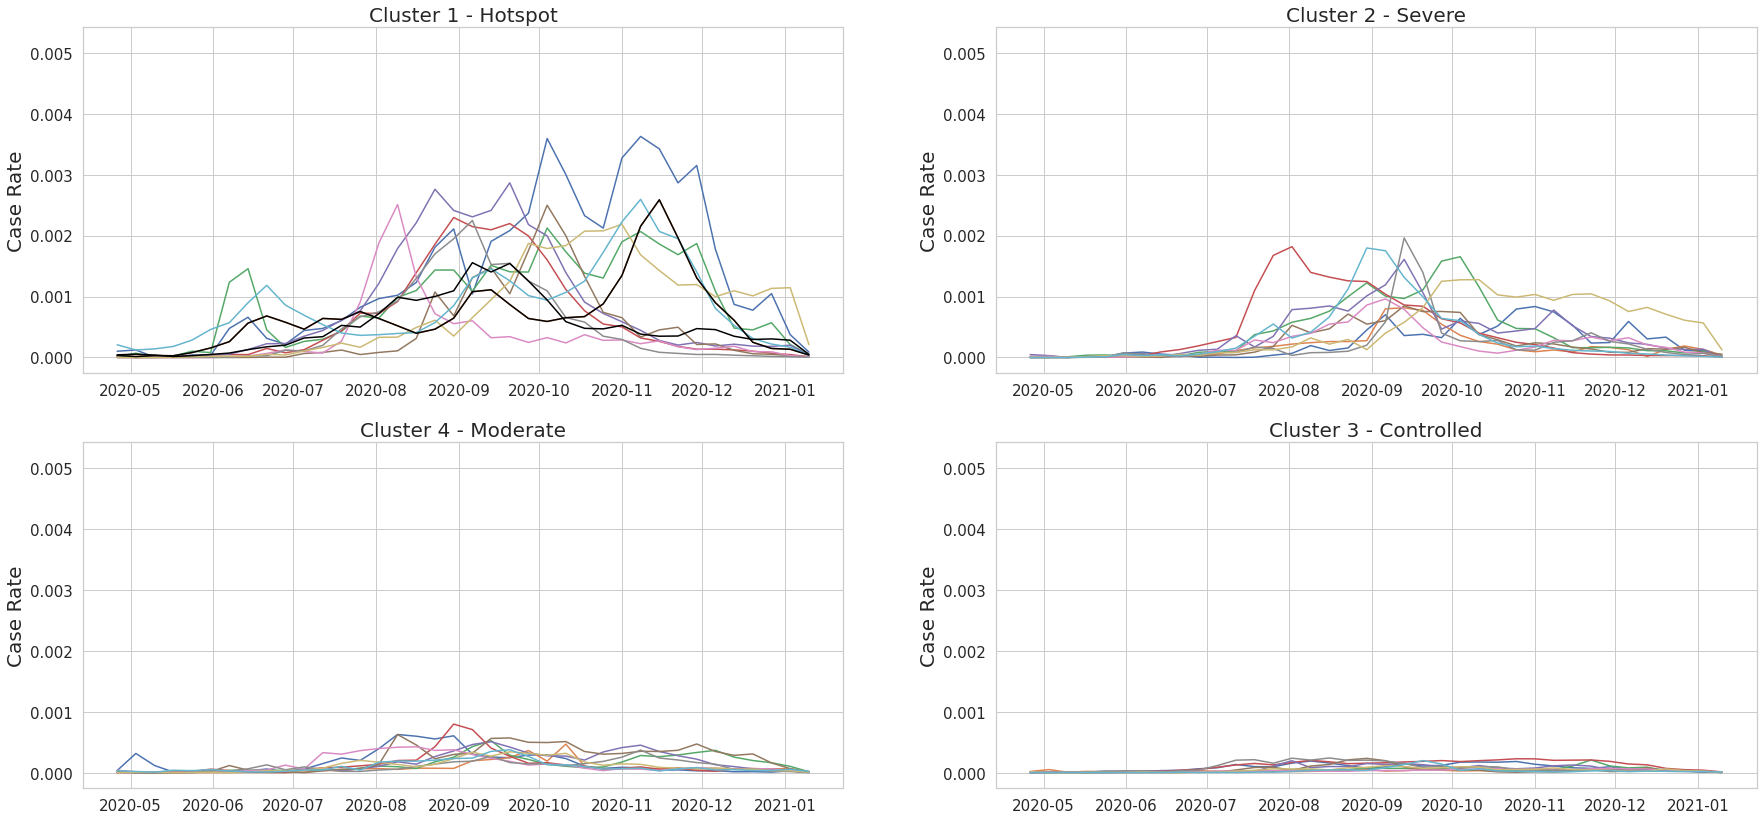

In [ ]:
plt.rcParams["figure.figsize"] = (30,14)
fig, axs = plt.subplots(2, 2)

plot_distclusters1(1,axs[0, 0])
#axs[0, 0].legend()
axs[0, 0].set_title('Cluster 1 - Hotspot',fontsize=20)
axs[0, 0].set_ylim(-0.0002579584431782748, 0.00541712730674377)

plot_distclusters(2,axs[0, 1])
#axs[0, 1].legend()
axs[0, 1].set_title('Cluster 2 - Severe',fontsize=20)
axs[0, 1].set_ylim(-0.0002579584431782748, 0.00541712730674377)

plot_distclusters(3,axs[1, 1])
#axs[1, 0].legend()
axs[1, 1].set_title('Cluster 3 - Controlled',fontsize=20)
axs[1, 1].set_ylim(-0.0002579584431782748, 0.00541712730674377)


plot_distclusters(4,axs[1, 0])
#axs[1, 1].legend()
axs[1, 0].set_title('Cluster 4 - Moderate',fontsize=20)
axs[1, 0].set_ylim(-0.0002579584431782748, 0.00541712730674377)

for ax in axs.flat:
    ax.set_ylabel('Case Rate',fontsize=20)
    ax.tick_params(labelsize=15)

# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()


# Map Colouring

In [ ]:
state_name=[]
state_id=[]
state_cluster_id=[]

In [ ]:
rev_states_map={}
cnt=0
for i in states_map:
  cnt+=1
  rev_states_map[states_map[i]]=(i,cnt)

In [ ]:
new_array=[3, 4, 4, 4, 3, 2, 4, 3, 3, 1, 1, 2, 3, 3, 3, 2, 4, 1, 1, 2, 2, 4, 3, 2, 2, 3, 3, 1, 3, 2, 3, 3, 3, 3, 2, 3, 2]
for i in rev_states_map:
  rev_states_map[i]=(rev_states_map[i][0],rev_states_map[i][1],new_array[rev_states_map[i][1]])
rev_states_map

{'AN': ('Andaman and Nicobar Islands', 1, 4),
 'AP': ('Andhra Pradesh', 2, 4),
 'AR': ('Arunachal Pradesh', 3, 4),
 'AS': ('Assam', 4, 3),
 'BR': ('Bihar', 5, 2),
 'CH': ('Chandigarh', 6, 4),
 'CT': ('Chhattisgarh', 7, 3),
 'DL': ('Delhi', 9, 1),
 'DN': ('Dadra and Nagar Haveli and Daman and Diu', 8, 3),
 'GA': ('Goa', 10, 1),
 'GJ': ('Gujarat', 11, 2),
 'HP': ('Himachal Pradesh', 13, 3),
 'HR': ('Haryana', 12, 3),
 'JH': ('Jharkhand', 15, 2),
 'JK': ('Jammu and Kashmir', 14, 3),
 'KA': ('Karnataka', 16, 4),
 'KL': ('Kerala', 17, 1),
 'LA': ('Ladakh', 18, 1),
 'MH': ('Maharashtra', 20, 2),
 'ML': ('Meghalaya', 22, 3),
 'MN': ('Manipur', 21, 4),
 'MP': ('Madhya Pradesh', 19, 2),
 'MZ': ('Mizoram', 23, 2),
 'NL': ('Nagaland', 24, 2),
 'OR': ('Odisha', 25, 3),
 'PB': ('Punjab', 27, 1),
 'PY': ('Puducherry', 26, 3),
 'RJ': ('Rajasthan', 28, 3),
 'SK': ('Sikkim', 29, 2),
 'TG': ('Telangana', 31, 3),
 'TN': ('Tamil Nadu', 30, 3),
 'TR': ('Tripura', 32, 3),
 'UP': ('Uttar Pradesh', 33, 3),
 '

In [ ]:
import json
india_states = json.load(open("/content/drive/MyDrive/Covid19ClusterPrediction/states_india.geojson", "r"))

In [ ]:
state_id_map = {}
for feature in india_states["features"]:
    feature["id"] = feature["properties"]["state_code"]
    state_id_map[feature["properties"]["st_nm"]] = feature["id"]

In [ ]:
temp=[]
cnt=0
for i in rev_states_map:
  if (rev_states_map[i][0] in state_id_map):
    # print(str(rev_states_map[i])+" "+str(state_id_map[rev_states_map[i][0]]))
    state_name.append(rev_states_map[i][0])
    state_id.append(state_id_map[rev_states_map[i][0]])
    state_cluster_id.append(rev_states_map[i][2])
  else:
    print(str(rev_states_map[i])+" NONE")
    state_name.append(rev_states_map[i][0])
    state_id.append(-1)
    state_cluster_id.append(rev_states_map[i][2])
    temp.append(cnt)
  cnt+=1

('Andaman and Nicobar Islands', 1, 4) NONE
('Arunachal Pradesh', 3, 4) NONE
('Dadra and Nagar Haveli and Daman and Diu', 8, 3) NONE
('Delhi', 9, 1) NONE
('Jammu and Kashmir', 14, 3) NONE
('Ladakh', 18, 1) NONE


In [ ]:
print(temp)

[0, 2, 7, 8, 13, 17]


In [ ]:
state_id[0]=35
state_id[2]=12
state_id[7]=26
state_id[8]=7
state_id[13]=1

In [ ]:
del(state_name[17])
del(state_cluster_id[17])
del(state_id[17])

In [ ]:
for i in range(len(state_cluster_id)):
  print(str(state_name[i])+" "+str(state_id[i])+" "+str(state_cluster_id[i]))

Andaman and Nicobar Islands 35 4
Andhra Pradesh 28 4
Arunachal Pradesh 12 4
Assam 18 3
Bihar 10 2
Chandigarh 4 4
Chhattisgarh 22 3
Dadra and Nagar Haveli and Daman and Diu 26 3
Delhi 7 1
Goa 30 1
Gujarat 24 2
Haryana 6 3
Himachal Pradesh 2 3
Jammu and Kashmir 1 3
Jharkhand 20 2
Karnataka 29 4
Kerala 32 1
Madhya Pradesh 23 2
Maharashtra 27 2
Manipur 14 4
Meghalaya 17 3
Mizoram 15 2
Nagaland 13 2
Odisha 21 3
Puducherry 34 3
Punjab 3 1
Rajasthan 8 3
Sikkim 11 2
Tamil Nadu 33 3
Telangana 0 3
Tripura 16 3
Uttar Pradesh 9 3
Uttarakhand 5 2
West Bengal 19 3


In [ ]:
len(rev_states_map)

35

In [ ]:
rev_states_map['LD']=('Lakswadeep',19,2)

In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 4.7 MB/s 
     |████████████████████████████████| 15.4 MB 38 kB/s 
     |████████████████████████████████| 6.3 MB 37.3 MB/s 


In [ ]:
import geopandas as gpd
district_map_df = gpd.read_file('/content/drive/MyDrive/Covid19ClusterPrediction/India_States_and_Districts/c44c9b96-f570-4ee3-97f1-ebad64efa4c2202044-1-1rb4x6s.8xx6.shp')
district_map_df.head()
state_map_df=gpd.read_file('/content/drive/MyDrive/Covid19ClusterPrediction/India_States_and_Districts/india-polygon.shp')
state_map_df.tail()
merged_df=district_map_df[["distname",'geometry']].copy().rename(columns={"distname": "name"})\
.append((state_map_df[["st_nm","geometry"]].copy().rename(columns={"st_nm":"name"})),ignore_index=True)
# merged_df["goemetry"]=district_map_df['geometry']
#merged_df.head()
# merged_df["Cluster_Code"]=cluster_code
# #merged_df.head()
# merged_df=merged_df.iloc[::-1]

In [ ]:
len(merged_df)

764

In [ ]:
import random
cluster_code=[]
for i in range(len(merged_df)):
  if(i<727):
    cluster_code.append(1)
  else:
    cluster_code.append(random.randint(2,4))
print(cluster_code)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
cluster_code[200]=5
cluster_code[100]=5
cluster_code[300]=5
cluster_code[400]=5
cluster_code[500]=5
cluster_code[600]=5
cluster_code[700]=5
cluster_code[150]=5
cluster_code[250]=5
cluster_code[350]=5
cluster_code[450]=5
cluster_code[650]=5
cluster_code[675]=5
cluster_code[451]=5
cluster_code[652]=5
#Red Districts

In [ ]:
merged_df["Cluster_Code"]=cluster_code


In [ ]:
merged_df=merged_df.iloc[::-1]

In [ ]:
merged_df.iloc[0]

name                                                       Ladakh
geometry        POLYGON ((76.79483099050624 33.25515265615444,...
Cluster_Code                                                    2
Name: 763, dtype: object

In [ ]:
merged_df=merged_df.where(merged_df["Cluster_Code"]!=1).dropna()

In [ ]:
len(merged_df)

52

In [ ]:
merged_df.iloc[1]

name                                            Jammu and Kashmir
geometry        POLYGON ((74.09957161510904 35.14187190888669,...
Cluster_Code                                                    2
Name: 762, dtype: object

In [ ]:
import xlrd
import random
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

sns.set_style('whitegrid')


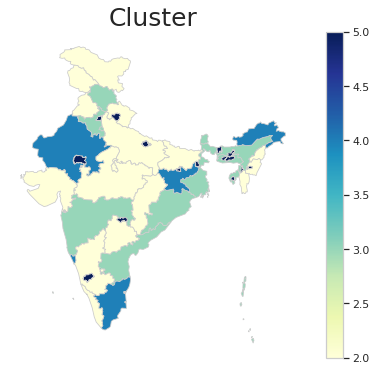

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('Cluster', fontdict={'fontsize': '25', 'fontweight' : '3'})

# plot the figure
merged_df.plot(column='Cluster_Code', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,)

In [ ]:
import pandas as pd
import numpy as np
import math

import geopandas as gpd
import json

from bokeh.io import output_notebook, show, output_file
output_notebook()
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, NumeralTickFormatter
from bokeh.palettes import brewer

from bokeh.io.doc import curdoc
from bokeh.models import Slider, HoverTool, Select
from bokeh.layouts import widgetbox, row, column


In [ ]:
merged_json = json.loads(merged_df.to_json())

#Convert to str like object
json_data = json.dumps(merged_json)
geosource = GeoJSONDataSource(geojson = json_data)


#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][8]
#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]
#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors. Input nan_color.
color_mapper = LinearColorMapper(palette = palette, low = merged_df['Cluster_Code'].min(), high = merged_df['Cluster_Code'].max(), nan_color = '#d9d9d9')
#Define custom tick labels for color bar.
# tick_labels = {'5000': '>5000'}


In [ ]:
#Add hover tool
hover = HoverTool(tooltips = [ ('Name','@name'),('Cluster','@Cluster_Code')])
#Create color bar.
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
                     border_line_color=None,location = (0,0), orientation = 'horizontal')
#Create figure object.
pp = figure(title = 'Number of Covid-19 cases', plot_height = 800 , plot_width = 850, toolbar_location = None, tools = [hover])
pp.xaxis.visible = False
pp.yaxis.visible = False
pp.xgrid.grid_line_color = None
pp.ygrid.grid_line_color = None
#Add patch renderer to figure.
pp.patches('xs','ys', source = geosource,fill_color = {'field' :'Cluster_Code', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)
#Specify layout
pp.add_layout(color_bar, 'below')

output_file("foo.html")
#Display plot
show(pp)

In [ ]:
len(clusters[1]+clusters[6])

49

Next Meeting

1. Assign clusters for 5D and 6D districts - DONE
2. Overlay 1D districts on the map - red - DONE

Stretch Goals

1. Kmeans
2. Analysis deceased data
3. Start writing the paper

## Assigning clusters to 5D and 6D districts among 1D to 4D

In [ ]:
def findRootClust(x):
  clustNum={}
  for entity in clusters[x]:
    distMin=float('inf')
    for i in range(1,5):
      dist=0
      for district in clusters[i]:
        dist+=scoreDs[col_dic[entity]][col_dic[district]]
      dist = dist/len(clusters[i])
      if(distMin>dist):
        clustNum[entity]=i
        distMin=dist
  return clustNum

In [ ]:
clust5Assigned = findRootClust(5)
clust6Assigned = findRootClust(6)

for d in clust5Assigned:
  clusters[clust5Assigned[d]].append(d)
for d in clust6Assigned:
  clusters[clust6Assigned[d]].append(d)

In [ ]:
count=0
for c in clusters[1]:
  idx=col_dic[c].find('-')
  if(col_dic[c][idx+1:] == 'C'):
    count+=1
    continue
  print("\"",str(col_dic[c][idx+1:]).strip()+"\",",end="")

" Gurugram"," Leh"," Kozhikode"," Pune"," Nagpur"," Papum Pare"," Puducherry"," Pathanamthitta"," Bengaluru Urban"," Faridabad"," Bijapur"," Kinnaur"," Raigad"," Sangli"," Kottayam"," Delhi"," Khordha"," Alappuzha"," S.P.S. Nellore"," Karaikal"," Thrissur"," Ernakulam"," East Godavari"," Kancheepuram"," Prakasam",

In [ ]:
len(clusters[1])

30

### Next Meeting

* Clean up 1D Districts - Done
* Cleap up 1S States - based on population / Covid Numbers (1S and 1D are new hotsposts) - Done
* Map on updated list - Done
* Perform Kmeans clustering (Chooose pivots based on heirarchial clustering) and validate number of clusters using elbow method - Not Done
* Start Writing Paper - Sir will share overleaf
* Analysis of deceased data for states -  Done


## Cleaning 1S States

1S States :

1. Kerala
2. Goa
3. Ladakh
4. Puduchurrey
5. Delhi

Filtering out states having absolute covid numbers <50k

1. Kerala
2. Goa
3. Delhi

## Cleaning 1D Districts

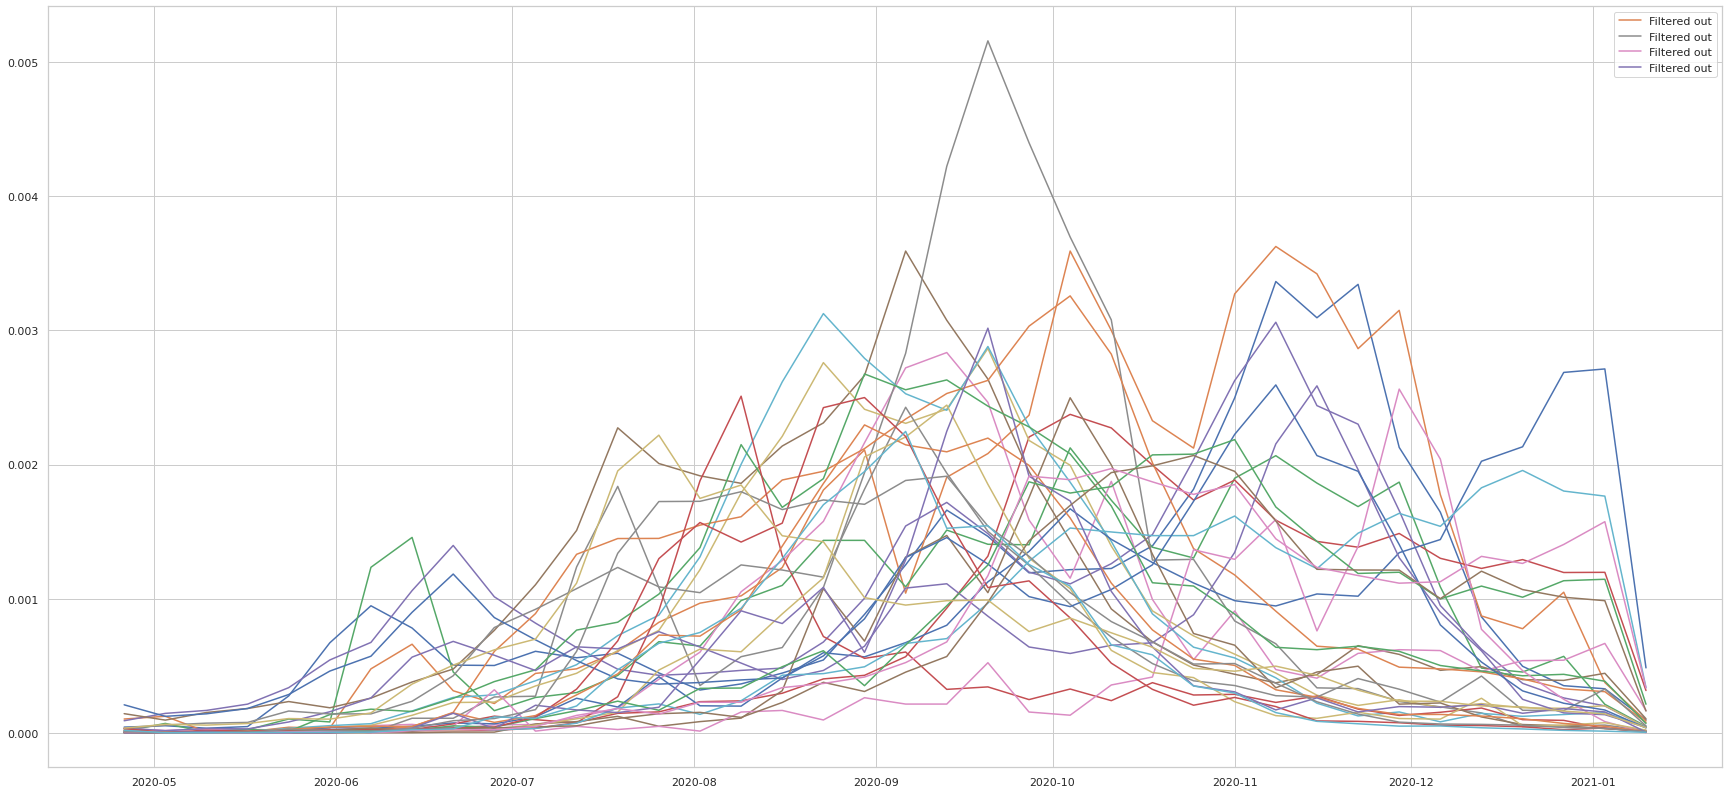

In [ ]:
for i in clusters[1]:
  #print(col_dic[i])
  if(i==395 or i == 251 or i==155 or i==21):
    plt.plot(df[col_dic[i]],label="Filtered out")
  else:
    plt.plot(df[col_dic[i]])
plt.legend()

In [ ]:
for i in clusters[1]:
  # print(i,col_dic[i])
  # print()
  pass

### 1D States :

Maharashtra-Pune
Puducherry-Puducherry
Haryana-Gurugram
Maharashtra-Nagpur
Karnataka-Bengaluru Urban
Kerala-Kozhikode
Kerala-Pathanamthitta
Haryana-Faridabad
Chhattisgarh-Bijapur
Maharashtra-Raigad
Maharashtra-Sangli
Kerala-Kottayam
Delhi-Delhi
Odisha-Khordha
Kerala-Alappuzha
Andhra Pradesh-S.P.S. Nellore
Kerala-Thrissur
Kerala-Ernakulam
Andhra Pradesh-East Godavari
Tamil Nadu-Kancheepuram
Andhra Pradesh-Prakasam

### Filtering out districts having absolute covid numbers <7k

Puducherry-Karaikal

Ladakh-Leh

Arunachal Pradesh-Papum Pare

Himachal Pradesh-Kinnaur

In [ ]:
for it in helper(1):
  print(it)

('Tamil Nadu', 2.7027027027027026)
('Karnataka', 3.3333333333333335)
('Odisha', 3.3333333333333335)
('Chhattisgarh', 3.571428571428571)
('Arunachal Pradesh', 7.6923076923076925)
('Haryana', 9.090909090909092)
('Himachal Pradesh', 9.090909090909092)
('Maharashtra', 11.428571428571429)
('Andhra Pradesh', 23.076923076923077)
('Kerala', 42.857142857142854)
('Ladakh', 50.0)
('LA', 100.0)
('DL', 100.0)
('PY', 100.0)
('Puducherry', 100.0)
('GA', 100.0)
('AN', 100.0)
('Delhi', 100.0)


In [ ]:
sc={}
for c in range(1,5):
  sc[c]=[]
  for e in clusters[c]:
    idx=col_dic[e].find('-')
    name=col_dic[e][:idx]
    if(name=="Punjab"):
      sc[c].append(col_dic[e][idx+1:])

In [ ]:
sc

{1: [],
 2: ['Ludhiana',
  'Faridkot',
  'Jalandhar',
  'Bathinda',
  'Pathankot',
  'S.A.S. Nagar'],
 3: ['Tarn Taran', 'Sangrur'],
 4: ['Sri Muktsar Sahib',
  'Fazilka',
  'Gurdaspur',
  'Amritsar',
  'Kapurthala',
  'Barnala',
  'Fatehgarh Sahib',
  'Mansa',
  'Ferozepur',
  'Moga',
  'Patiala',
  'Rupnagar',
  'Hoshiarpur',
  'Shahid Bhagat Singh Nagar']}

In [ ]:
rss=[]
for k in range(1,10):
  km_dba = TimeSeriesKMeans(n_clusters=k, metric="dtw").fit(normalised_ds.transpose())
  rss.append(km_dba.inertia_)

In [ ]:
rss_temp=[]
for rr in rss:
  rss_temp.append(rr)

Text(0, 0.5, 'Residual Sum of Squares (RSS)')

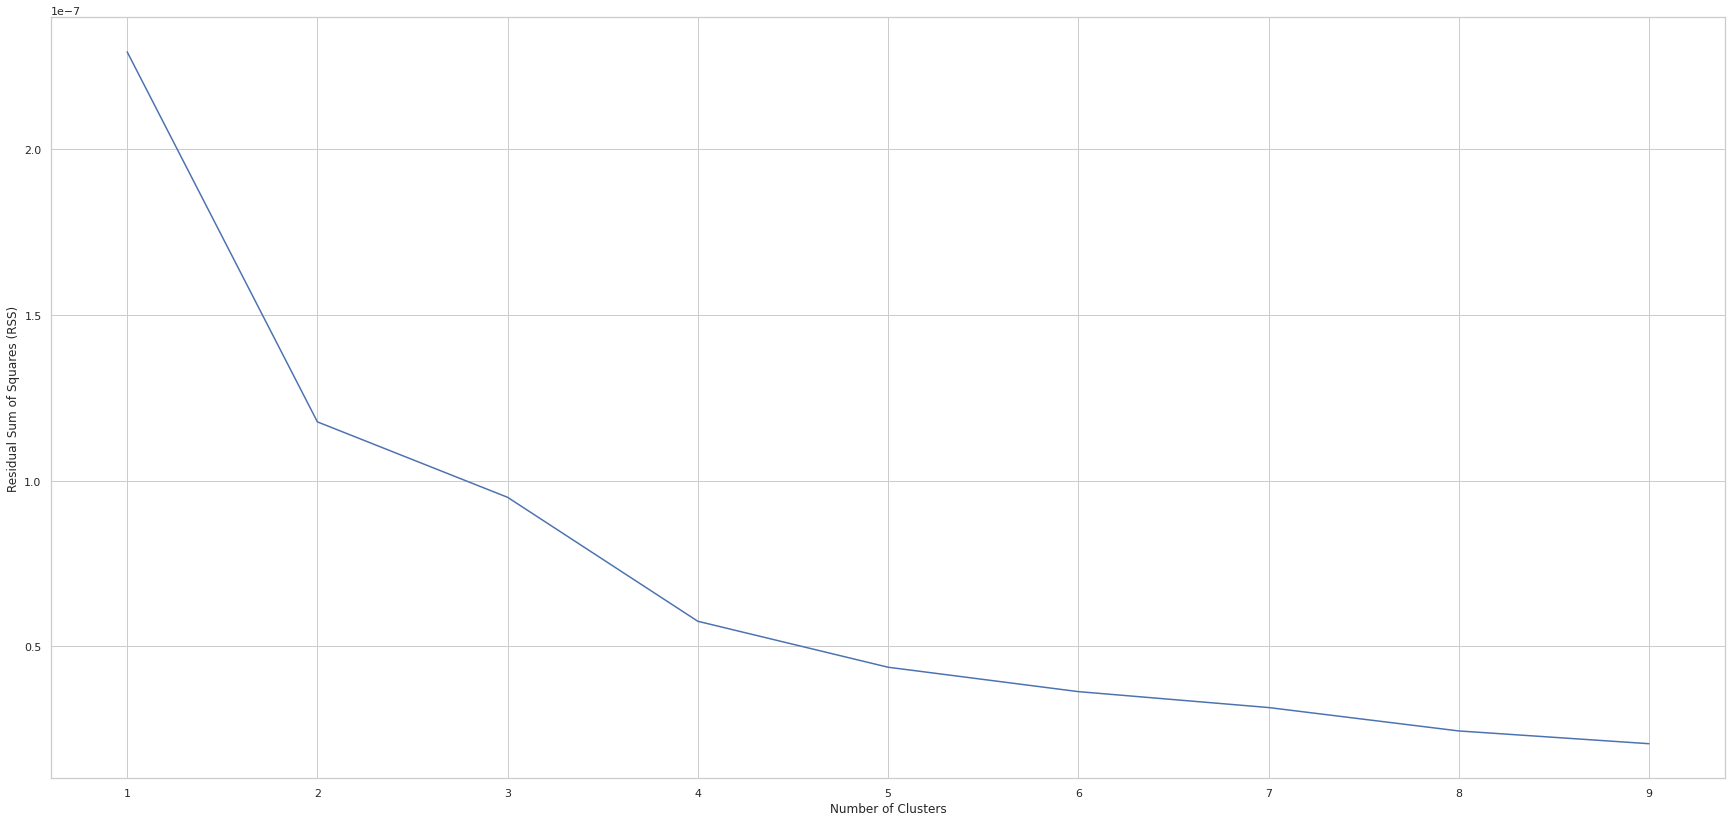

In [ ]:
xax=[1,2,3,4,5,6,7,8,9]
plt.plot(xax,rss)
plt.xlabel("Number of Clusters")
plt.ylabel("Residual Sum of Squares (RSS)")

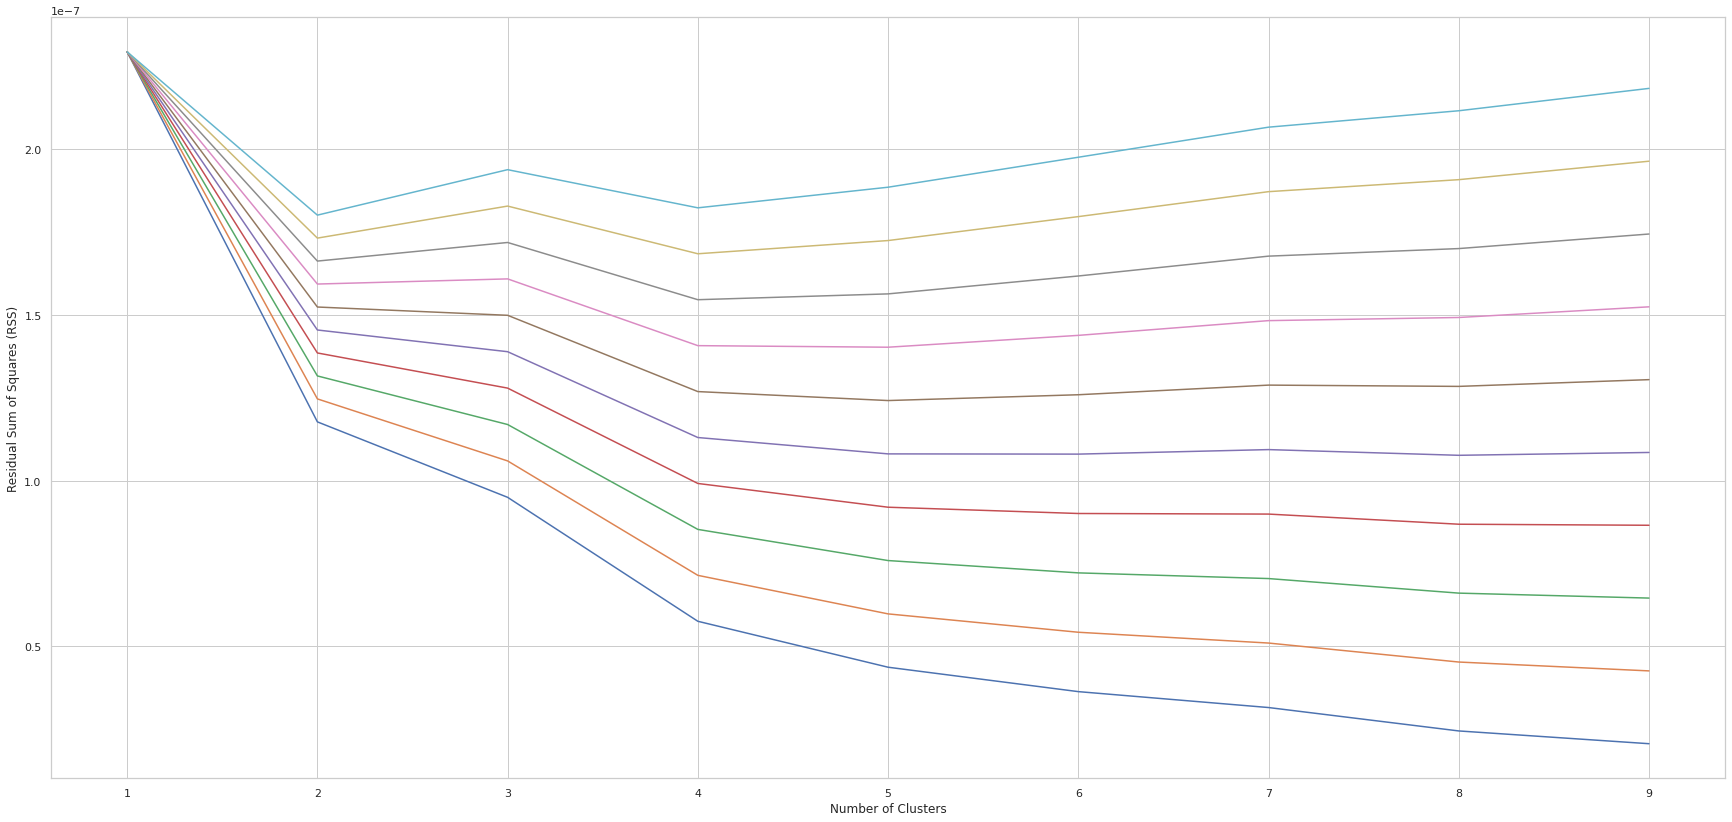

In [ ]:
for i in range(10):
  ff=i/10
  rss=rss_temp.copy()
  for r in range(len(rss)):
    rss[r]=rss_temp[r]+ (ff * 10**(-7))*math.log((r+1))
  xax=[1,2,3,4,5,6,7,8,9]
  plt.plot(xax,rss)
  plt.xlabel("Number of Clusters")
  plt.ylabel("Residual Sum of Squares (RSS)")
  rss=rss_temp.copy()

In [ ]:
cluster_districts={}
for k in range(1,7):
  cluster_districts[k]=[]
  for e in clusters[k]:
    cluster_districts[k].append(col_dic[e])

In [ ]:
cluster_districts[1]

['Haryana-Gurugram',
 'Ladakh-Leh',
 'LA-C',
 'Kerala-Kozhikode',
 'DL-C',
 'Maharashtra-Pune',
 'Maharashtra-Nagpur',
 'Arunachal Pradesh-Papum Pare',
 'PY-C',
 'Puducherry-Puducherry',
 'Kerala-Pathanamthitta',
 'Karnataka-Bengaluru Urban',
 'GA-C',
 'AN-C',
 'Haryana-Faridabad',
 'Chhattisgarh-Bijapur',
 'Himachal Pradesh-Kinnaur',
 'Maharashtra-Raigad',
 'Maharashtra-Sangli',
 'Kerala-Kottayam',
 'Delhi-Delhi',
 'Odisha-Khordha',
 'Kerala-Alappuzha',
 'Andhra Pradesh-S.P.S. Nellore',
 'Puducherry-Karaikal',
 'Kerala-Thrissur',
 'Kerala-Ernakulam',
 'Andhra Pradesh-East Godavari',
 'Tamil Nadu-Kancheepuram',
 'Andhra Pradesh-Prakasam']

In [ ]:
cluster_states={'1': ['Kerala', 'Goa', 'Puducherry', 'Delhi', 'Ladakh'],
 '2': ['Lakshwadeep',
  'Bihar',
  'Uttar Pradesh',
  'Gujarat',
  'Madhya Pradesh',
  'Meghalaya',
  'Mizoram',
  'Jharkhand',
  'Rajasthan',
  'West Bengal'],
 '3': ['Himachal Pradesh',
  'Sikkim',
  'Chhattisgarh',
  'Manipur',
  'Assam',
  'Dadra and Nagar Haveli and Daman and Diu',
  'Nagaland',
  'Odisha',
  'Punjab',
  'India',
  'Telangana',
  'Haryana',
  'Jammu and Kashmir',
  'Uttarakhand',
  'Tamil Nadu',
  'Tripura'],
 '4': ['Arunachal Pradesh',
  'Karnataka',
  'Maharashtra',
  'Andaman and Nicobar Islands',
  'Andhra Pradesh',
  'Chandigarh']}

In [ ]:
# for k in range(1,7):
#   for elem in cluster_districts[k]:
#     if(elem[elem.find('-'):]=="-C"):
#       cluster_districts[k].remove(elem)


In [ ]:
cluster_districts[5]

['Maharashtra-Nashik',
 'Chhattisgarh-Narayanpur',
 'Kerala-Kannur',
 'Kerala-Kasaragod',
 'Chhattisgarh-Sukma',
 'MH-C',
 'Maharashtra-Thane',
 'Andhra Pradesh-Visakhapatnam',
 'Madhya Pradesh-Indore',
 'AP-C',
 'Jammu and Kashmir-Ganderbal',
 'Karnataka-Shivamogga',
 'Jammu and Kashmir-Jammu',
 'Ladakh-Kargil',
 'Karnataka-Mysuru',
 'Andhra Pradesh-Anantapur',
 'Tamil Nadu-Coimbatore',
 'AN-C',
 'Himachal Pradesh-Shimla',
 'Kerala-Palakkad',
 'Kerala-Idukki',
 'Odisha-Jharsuguda',
 'Tamil Nadu-Theni',
 'Karnataka-Dakshina Kannada',
 'Karnataka-Ballari',
 'Uttar Pradesh-Lucknow',
 'Chhattisgarh-Raipur',
 'Maharashtra-Mumbai',
 'Uttarakhand-Dehradun',
 'Andhra Pradesh-Guntur',
 'Tripura-West Tripura',
 'Maharashtra-Jalgaon',
 'Chhattisgarh-Surguja',
 'KA-C',
 'Odisha-Nuapada',
 'Chhattisgarh-Raigarh',
 'Nagaland-Dimapur',
 'Maharashtra-Kolhapur',
 'Maharashtra-Ahmednagar',
 'Jammu and Kashmir-Srinagar',
 'Haryana-Panchkula',
 'Tamil Nadu-Chengalpattu',
 'Karnataka-Hassan',
 'Chhattisga

In [ ]:
weights=[[0 for x in range(6)]for y in range(4)]
count=0
for c in range(1,5):
  for d in range(1,7):
    count=0
    #print(c)
    for dis in cluster_districts[d]:
      if(dis[:dis.find('-')] in cluster_states[str(c)]):
        count+=1
      if(len(dis)==4 and inv_map[dis[:dis.find('-')]] in cluster_states[str(c)]):
        #print(dis)
        count+=1

    weights[c-1][d-1]=count/len(cluster_districts[d])


NameError: ignored

In [ ]:
G = {
	'1S': {'1D': weights[0][0], '2D': weights[0][1], '3D': weights[0][2], '4D': weights[0][3], '5D': weights[0][4], '6D':weights[0][5]},
	'2S': {'1D': weights[1][0], '2D': weights[1][1], '3D': weights[1][2], '4D': weights[1][3], '5D': weights[1][4], '6D':weights[1][5]},
	'3S': {'1D': weights[2][0], '2D': weights[2][1], '3D': weights[2][2], '4D': weights[2][3], '5D': weights[2][4], '6D':weights[2][5]},
	'4S': {'1D': weights[3][0], '2D': weights[3][1], '3D': weights[3][2], '4D': weights[3][3], '5D': weights[3][4], '6D':weights[3][5]}
}

In [ ]:
from scipy.optimize import linear_sum_assignment

In [ ]:
row_ind, col_ind = linear_sum_assignment(np.array(weights),maximize=True)

In [ ]:
row_ind

In [ ]:
col_ind

S ---> D

0(RED)-> 0(RED) ------------ 0(Red)

1(GREEN)-> 2(GREEN) --------- 2(Green)

2(PINK) -> 1 (YELLOW) ------- 3 (Pink)

3 (YELLOW) -> 5 (MERGED with rest) ---- 1 (Yellow)

In [ ]:
pd.DataFrame(weights)

# Final DS-SC Correlation

* 1D -> 1S (Unreliable) red

* 2D+5D+6D -> 4S (Sharp Rise n Decline) yellow

* 4D -> 3S (OK States | National Average) pink

* 3D -> 2S (Hindi States | Plateau) green


Redefining weights

In [ ]:
sd_map={}
for entity in pop_dic.keys():
  state=entity[:entity.find('-')]
  dist=entity[entity.find('-')+1:]
  if(state in sd_map):
    sd_map[state].append(dist)
  else:
    sd_map[state]=[]
    sd_map[state].append(dist)
sd_map["Lakshwadeep"]=["Lakshwadeep"]

In [ ]:
weights=[[0 for x in range(6)]for y in range(4)]
count=0
for c in range(1,5):
  dis_left=set()
  for state in cluster_states[str(c)]:
    if(state=="India"):
      continue
    for dist in sd_map[state]:
      dis_left.add(dist)
  for d in range(1,7):
    count=0
    #print(c)
    for dis in cluster_districts[d]:
      if(dis[:dis.find('-')] in cluster_states[str(c)]):
        count+=1
      if(len(dis)==4 and inv_map[dis[:dis.find('-')]] in cluster_states[str(c)]):
        #print(dis)
        count+=1

    weights[c-1][d-1]=count/len(set(cluster_districts[d]).union(set(dis_left)))


In [ ]:
pd.DataFrame(weights).to_csv('weights.csv')

In [ ]:
row_ind, col_ind = linear_sum_assignment(np.array(weights),maximize=True)

In [ ]:
col_ind

In [ ]:
states_map = {
    "Andaman and Nicobar Islands":"AN",
    "Andhra Pradesh":"AP",
    "Arunachal Pradesh":"AR",
    "Assam":"AS",
    "Bihar":"BR",
    "Chandigarh":"CH",
    "Chhattisgarh":"CT",
    "Dadra and Nagar Haveli and Daman and Diu":"DN",
    "Delhi":"DL",
    "Goa":"GA",
    "Gujarat":"GJ",
    "Haryana":"HR",
    "Himachal Pradesh":"HP",
    "Jammu and Kashmir":"JK",
    "Jharkhand":"JH",
    "Karnataka":"KA",
    "Kerala":"KL",
    "Ladakh":"LA",
    "Madhya Pradesh":"MP",
    "Maharashtra":"MH",
    "Manipur":"MN",
    "Meghalaya":"ML",
    "Mizoram":"MZ",
    "Nagaland":"NL",
    "Odisha":"OR",
    "Puducherry":"PY",
    "Punjab":"PB",
    "Rajasthan":"RJ",
    "Sikkim":"SK",
    "Tamil Nadu":"TN",
    "Telangana":"TG",
    "Tripura":"TR",
    "Uttar Pradesh":"UP",
    "Uttarakhand":"UT",
    "West Bengal":"WB",
    "Lakshwadeep":"LD",
    "India":"TT"
}

In [ ]:
inv_map = {v: k for k, v in states_map.items()}

In [ ]:
inv_map

In [ ]:
inv_map['TT']="India"

In [ ]:
df=pd.DataFrame(weights)

In [ ]:
from sklearn import preprocessing
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [ ]:
len(clusters[3])

In [ ]:
helper(1)

In [ ]:
for c in clusters[1]:
  print(col_dic[c])

In [ ]:
states_map["Uttarakhand"]

In [ ]:
helper(6)

[('Odisha', 3.3333333333333335),
 ('West Bengal', 4.3478260869565215),
 ('Haryana', 4.545454545454546),
 ('Punjab', 4.545454545454546),
 ('Tamil Nadu', 5.405405405405405),
 ('Karnataka', 6.666666666666667),
 ('Chhattisgarh', 7.142857142857142),
 ('Maharashtra', 8.571428571428571),
 ('Himachal Pradesh', 9.090909090909092),
 ('Puducherry', 50.0),
 ('Kerala', 57.14285714285714),
 ('Andhra Pradesh', 69.23076923076923),
 ('CH', 100.0),
 ('Chandigarh', 100.0),
 ('KL', 100.0),
 ('Delhi', 100.0)]